## Is the Arable land price increasing over the years?
## All Land Types and Grassland during 2013-2020. 

These prices have been collected from: 
- Ireland: https://data.gov.ie/dataset/ara02-agricultural-land-sales?package_type=dataset
- Comparing Ireland with Europe: https://ec.europa.eu/eurostat/databrowser/view/apri_pi15_outq/default/table?lang=en

-INTRODUCTION

The statistics agricultural land prices and rents methodology is to collect and disseminate statistical information on the prices and rents of agricultural land in the European Union to improve harmonization and comparability of the data, provide methodological and conceptual clarifications, and facilitate an understanding of various key issues related to land prices and rents. The land price statistics are expressed as the value of one hectare of free agricultural land in each reference period (year). 

In [1]:
# Lets start importing all the necessary Libraries we are going to use for the analysis, as we go forward it's important to keep updating. 
import pandas as pd
import numpy as np
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
%matplotlib inline 
sns.set(color_codes=True)
import panel as pn
pn.extension('tabulator')
import hvplot.pandas
from sklearn.preprocessing import LabelEncoder
pn.extension()
import sklearn.preprocessing as preproc
from sklearn.preprocessing import OneHotEncoder


In [2]:
# Lets start discovering the head of the Dataset for Ireland Analysis
df=pd.read_csv("ARA02.20221209230851.xls")
df.head()

STATISTIC        Statistic Label  TLIST(A1)  Year  C03388V04075  \
0  ARA02C01  Median Price per Acre       2013  2013             1   
1  ARA02C01  Median Price per Acre       2013  2013             1   
2  ARA02C01  Median Price per Acre       2013  2013             1   
3  ARA02C01  Median Price per Acre       2013  2013             1   
4  ARA02C01  Median Price per Acre       2013  2013             1   

  Type of Land Use C02196V02652   Region           UNIT         VALUE  
0   All Land Types            -    State  Euro per Acre   6389.783163  
1   All Land Types         IE11   Border  Euro per Acre   4685.224509  
2   All Land Types         IE12  Midland  Euro per Acre   7114.568810  
3   All Land Types         IE13     West  Euro per Acre   4496.514077  
4   All Land Types         IE21   Dublin  Euro per Acre  10117.156674

In [3]:
# In order to know details about the dataset, we are going to read more columns.
df.tail(1000)

STATISTIC         Statistic Label  TLIST(A1)  Year  C03388V04075  \
728   ARA02C04  Mean Price per Hectare       2015  2015             3   
729   ARA02C04  Mean Price per Hectare       2016  2016             1   
730   ARA02C04  Mean Price per Hectare       2016  2016             1   
731   ARA02C04  Mean Price per Hectare       2016  2016             1   
732   ARA02C04  Mean Price per Hectare       2016  2016             1   
...        ...                     ...        ...   ...           ...   
1723  ARA02C08      Value of Land Sold       2020  2020             3   
1724  ARA02C08      Value of Land Sold       2020  2020             3   
1725  ARA02C08      Value of Land Sold       2020  2020             3   
1726  ARA02C08      Value of Land Sold       2020  2020             3   
1727  ARA02C08      Value of Land Sold       2020  2020             3   

         Type of Land Use C02196V02652      Region              UNIT  \
728   Permanent Grassland         IE25  South-West  Euro per Hectare   
729        All Land Types            -       State  Euro per Hectare   
730        All Land Types         IE11      Border  Euro per Hectare   
731        All Land Types         IE12     Midland  Euro per Hectare   
732        All Land Types         IE13        West  Euro per Hectare   
...                   ...          ...         ...               ...   
1723  Permanent Grassland         IE21      Dublin              Euro   
1724  Permanent Grassland         IE22    Mid-East              Euro   
1725  Permanent Grassland         IE23    Mid-West              Euro   
1726  Permanent Grassland         IE24  South-East              Euro   
1727  Permanent Grassland         IE25  South-West              Euro   

             VALUE  
728   1.390033e+04  
729   1.363934e+04  
730   8.958609e+03  
731   1.283137e+04  
732   7.841999e+03  
...            ...  
1723  2.670000e+06  
1724  2.886356e+07  
1725  3.145546e+07  
1726  1.739611e+07  
1727  4.446462e+06  

[1000 rows x 10 columns]

### Comments:

- In this first phase the General view of our Dataset help us to discover and understand what we are looking at, to understand the problem we want to solve, thinking about the entire dataset and the meaning of the variables.


- As we can see our Dataset contains different values per column which need to be grouped for the analysis, and also this will help us to perform better and prepare for Machine learning. 

In [4]:
# Lets find the values in our dataset.
df.describe()

TLIST(A1)         Year  C03388V04075         VALUE
count  1728.000000  1728.000000   1728.000000  1.608000e+03
mean   2016.500000  2016.500000      2.000000  7.286694e+06
std       2.291951     2.291951      0.816733  3.733202e+07
min    2013.000000  2013.000000      1.000000  4.000000e+00
25%    2014.750000  2014.750000      1.000000  3.214028e+03
50%    2016.500000  2016.500000      2.000000  9.322434e+03
75%    2018.250000  2018.250000      3.000000  2.191193e+04
max    2020.000000  2020.000000      3.000000  4.426477e+08

### Comments:

- *Describe* provides descriptive information which help us to know more about the dataset. This includes statistics that summarize the central tendency of the variable, dispersion, the presence of empty values and shape.

In [5]:
# In order to know the shape of our dataset, which contains 1728 rows and 10 features.
df.shape

(1728, 10)

In [6]:
# Important to display the values of our dataframes.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   STATISTIC         1728 non-null   object 
 1   Statistic Label   1728 non-null   object 
 2   TLIST(A1)         1728 non-null   int64  
 3   Year              1728 non-null   int64  
 4   C03388V04075      1728 non-null   int64  
 5   Type of Land Use  1728 non-null   object 
 6   C02196V02652      1728 non-null   object 
 7   Region            1728 non-null   object 
 8   UNIT              1728 non-null   object 
 9   VALUE             1608 non-null   float64
dtypes: float64(1), int64(3), object(6)
memory usage: 135.1+ KB


In [7]:
# This help us to determine if there are any missing values.
df.isnull().sum()

STATISTIC             0
Statistic Label       0
TLIST(A1)             0
Year                  0
C03388V04075          0
Type of Land Use      0
C02196V02652          0
Region                0
UNIT                  0
VALUE               120
dtype: int64

### Comments: 

- Since the feature VALUE contains a total of *120 => Null values* Which are not going to affect the dataset, we decide to drop them, specially because for our analysis "Value is one of the main features" since we don't want to damage the data.


- Since the fact VALUE, contains especific values, and those are relevant for our analysis,  because can not be filled with any other, we Drop Nun values. 

In [8]:
# Since the fact VALUE contains especific values,and we can not fill this Nun Values with any other value, we Drop them. 
df.dropna(subset=["VALUE"], inplace=True) 

In [9]:
# Checking updates for Nun Values
df.isnull().sum()

STATISTIC           0
Statistic Label     0
TLIST(A1)           0
Year                0
C03388V04075        0
Type of Land Use    0
C02196V02652        0
Region              0
UNIT                0
VALUE               0
dtype: int64

### Comments: 

- As we can see non of the columns have Null Values, We just dropped the rows for VALUE, since it is an unic value which can not be filled with another.

In [10]:
# Check updates for the shape of the Dataset. 
df.shape

(1608, 10)

In [11]:
# Display data types in order to know more about the Dataset.
df.dtypes 

STATISTIC            object
Statistic Label      object
TLIST(A1)             int64
Year                  int64
C03388V04075          int64
Type of Land Use     object
C02196V02652         object
Region               object
UNIT                 object
VALUE               float64
dtype: object

In [12]:
# Lets rename the columns to avoid spaces, also It will help us with our analysis. 
df = df.rename(columns={"Statistic Label": "STATISTIC_LABEL", "Type of Land Use": "TYPE_OF_LAND_USE", "Year": "YEAR", "Region": "REGION"})

In [13]:
# Count the columns help us to know in detail the shape for each feature.
df.count() 

STATISTIC           1608
STATISTIC_LABEL     1608
TLIST(A1)           1608
YEAR                1608
C03388V04075        1608
TYPE_OF_LAND_USE    1608
C02196V02652        1608
REGION              1608
UNIT                1608
VALUE               1608
dtype: int64

In [14]:
# For deep exploring the features, let's identify the values for: STATISTIC
df["STATISTIC"].value_counts()

ARA02C01    201
ARA02C02    201
ARA02C03    201
ARA02C04    201
ARA02C05    201
ARA02C06    201
ARA02C07    201
ARA02C08    201
Name: STATISTIC, dtype: int64

In [15]:
# For deep exploring the features, let's identify the values for: STATISTIC_LABEL
df["STATISTIC_LABEL"].unique()

array(['Median Price per Acre', 'Median Price per Hectare',
       'Mean Price per Acre', 'Mean Price per Hectare',
       'Number of Transactions', 'Volume of Land Sold Acres',
       'Volume of Land Sold Hectares', 'Value of Land Sold'], dtype=object)

In [16]:
df["STATISTIC_LABEL"].value_counts()

Median Price per Acre           201
Median Price per Hectare        201
Mean Price per Acre             201
Mean Price per Hectare          201
Number of Transactions          201
Volume of Land Sold Acres       201
Volume of Land Sold Hectares    201
Value of Land Sold              201
Name: STATISTIC_LABEL, dtype: int64

### Comments: 

- Thanks to Value Counts, we know in details the values for the features: STATISTIC and STATISTIC_LABEL, based in the output we can conclude that both of them provide same values, STATISTIC_LABEL is the dictionary to understand the values for STATISTIC.  

In [17]:
# For deep exploring the features, let's identify the values for: TLIST(A1)
df["TLIST(A1)"].value_counts()

2013    208
2017    208
2018    208
2014    200
2015    200
2016    200
2019    192
2020    192
Name: TLIST(A1), dtype: int64

In [18]:
# For deep exploring the features, let's identify the values for: YEAR
df["YEAR"].value_counts()

2013    208
2017    208
2018    208
2014    200
2015    200
2016    200
2019    192
2020    192
Name: YEAR, dtype: int64

### Comments:

- Value Counts, help us to know in details the values for the features: TLIST(A1) and YEAR, based in the output we can determine the similarity in their values, they both provide the years in regards to the Data. 

In [19]:
# For deep exploring the features, let's identify the values for: C03388V04075
df["C03388V04075"].value_counts()

1    576
3    576
2    456
Name: C03388V04075, dtype: int64

In [20]:
# Lets find the values for the feature, in order to identify relation between features.
df["C03388V04075"].describe()

count    1608.000000
mean        2.000000
std         0.846678
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         3.000000
Name: C03388V04075, dtype: float64

In [21]:
# For deep exploring the features, let's identify the values for: TYPE_OF_LAND_USE.
df["TYPE_OF_LAND_USE"].value_counts()

All Land Types         576
Permanent Grassland    576
Arable Land            456
Name: TYPE_OF_LAND_USE, dtype: int64

### Comments:

- Because of Value Counts, we are able to comprehend the values for: C03388V04075 and TYPE_OF_LAND_USE in great depth. Based on the output, we can say that both of them supply the same values, with TYPE_OF_LAND_USE serving as a dictionary for C03388V04075 values.

In [22]:
# Lets find the values for the feature. 
df["C02196V02652"].unique()

array(['-', 'IE11', 'IE12', 'IE13', 'IE21', 'IE22', 'IE23', 'IE24',
       'IE25'], dtype=object)

In [23]:
# For deep exploring the features, let's identify the values for: C02196V02652
df["C02196V02652"].value_counts()

-       192
IE12    192
IE21    192
IE22    192
IE24    192
IE25    184
IE23    168
IE11    160
IE13    136
Name: C02196V02652, dtype: int64

In [24]:
# Indentify the values for: REGION
df["REGION"].unique()

array(['State', 'Border', 'Midland', 'West', 'Dublin', 'Mid-East',
       'Mid-West', 'South-East', 'South-West'], dtype=object)

In [25]:
# For deep exploring the features, let's identify the values for: REGION
df["REGION"].value_counts()

State         192
Midland       192
Dublin        192
Mid-East      192
South-East    192
South-West    184
Mid-West      168
Border        160
West          136
Name: REGION, dtype: int64

### Comments: 

- We can fully understand the values for: C02196V02652 and REGION thanks to Value Counts. REGION, acts as a dictionary for C02196V02652 values, and the outcome indicates that both of them provide the same values.

In [26]:
# For deep exploring the features, let's identify the values for: UNIT
df["UNIT"].value_counts()

Number              603
Euro per Acre       402
Euro per Hectare    402
Euro                201
Name: UNIT, dtype: int64

In [27]:
# Indentify the values for the feature. 
df["VALUE"].unique()

array([6.38978316e+03, 4.68522451e+03, 7.11456881e+03, ...,
       2.88635644e+07, 3.14554650e+07, 1.73961122e+07])

In [28]:
# For deep exploring the features, let's identify the values for: VALUE
df["VALUE"].value_counts()

1.100000e+01    5
5.000000e+00    4
7.000000e+00    4
4.000000e+00    4
8.000000e+00    4
               ..
8.910541e+03    1
6.884928e+03    1
8.793197e+03    1
1.100955e+04    1
1.739611e+07    1
Name: VALUE, Length: 1442, dtype: int64

In [29]:
# Lets explore the values for the feature, in order to identify relation between features.
df["VALUE"].describe()

count    1.608000e+03
mean     7.286694e+06
std      3.733202e+07
min      4.000000e+00
25%      3.214028e+03
50%      9.322434e+03
75%      2.191193e+04
max      4.426477e+08
Name: VALUE, dtype: float64

In [30]:
# Lets group the numerical values related with the feature: VALUE
df.groupby("VALUE").mean()

TLIST(A1)         YEAR  C03388V04075
VALUE                                               
4.000000e+00  2018.000000  2018.000000           2.0
5.000000e+00  2015.250000  2015.250000           2.0
6.000000e+00  2014.666667  2014.666667           2.0
7.000000e+00  2018.750000  2018.750000           2.5
8.000000e+00  2016.750000  2016.750000           2.5
...                   ...          ...           ...
3.892198e+08  2014.000000  2014.000000           3.0
3.937341e+08  2013.000000  2013.000000           3.0
3.967758e+08  2017.000000  2017.000000           1.0
4.364767e+08  2013.000000  2013.000000           1.0
4.426477e+08  2014.000000  2014.000000           1.0

[1442 rows x 3 columns]

- ## Convert: Categorical Values => Numerical Values 

#### As we are know more in detail our data and recognize the features it's time to convert the Categorical values into Numerical Values in order to prepare it to perform better for Machine Learning. 

In [31]:
# create a label encoder
le = LabelEncoder()

In [32]:
# transform some categories using the label encoder
df["P_STATISTIC"] = le.fit_transform(df.STATISTIC)

In [33]:
# transform some categories using the label encoder
df["CODE_REGION"] = le.fit_transform(df.C02196V02652)

In [34]:
# transform some categories using the label encoder
df["UNITS"] = le.fit_transform(df.UNIT)

In [35]:
# view the first 5 rows of the dataframe to verify changes
df.head()

STATISTIC        STATISTIC_LABEL  TLIST(A1)  YEAR  C03388V04075  \
0  ARA02C01  Median Price per Acre       2013  2013             1   
1  ARA02C01  Median Price per Acre       2013  2013             1   
2  ARA02C01  Median Price per Acre       2013  2013             1   
3  ARA02C01  Median Price per Acre       2013  2013             1   
4  ARA02C01  Median Price per Acre       2013  2013             1   

  TYPE_OF_LAND_USE C02196V02652   REGION           UNIT         VALUE  \
0   All Land Types            -    State  Euro per Acre   6389.783163   
1   All Land Types         IE11   Border  Euro per Acre   4685.224509   
2   All Land Types         IE12  Midland  Euro per Acre   7114.568810   
3   All Land Types         IE13     West  Euro per Acre   4496.514077   
4   All Land Types         IE21   Dublin  Euro per Acre  10117.156674   

   P_STATISTIC  CODE_REGION  UNITS  
0            0            0      1  
1            0            1      1  
2            0            2      1  
3            0            3      1  
4            0            4      1

In [36]:
# count the occurrences of each unique value
df["UNITS"].value_counts()

3    603
1    402
2    402
0    201
Name: UNITS, dtype: int64

### Comments:

- Thanks Groupby we can group the Numerical Values and find relationship with features, also we can obtain the Mean, Min, and Max values which help us in order to understand better our data. 

In [37]:
# Lets find the values in our dataset.
df.describe()

TLIST(A1)         YEAR  C03388V04075         VALUE  P_STATISTIC  \
count  1608.000000  1608.000000   1608.000000  1.608000e+03  1608.000000   
mean   2016.462687  2016.462687      2.000000  7.286694e+06     3.500000   
std       2.281900     2.281900      0.846678  3.733202e+07     2.292001   
min    2013.000000  2013.000000      1.000000  4.000000e+00     0.000000   
25%    2014.000000  2014.000000      1.000000  3.214028e+03     1.750000   
50%    2016.000000  2016.000000      2.000000  9.322434e+03     3.500000   
75%    2018.000000  2018.000000      3.000000  2.191193e+04     5.250000   
max    2020.000000  2020.000000      3.000000  4.426477e+08     7.000000   

       CODE_REGION        UNITS  
count  1608.000000  1608.000000  
mean      4.044776     1.875000  
std       2.610206     1.053596  
min       0.000000     0.000000  
25%       2.000000     1.000000  
50%       4.000000     2.000000  
75%       6.000000     3.000000  
max       8.000000     3.000000

In [38]:
# count the occurrences of each unique value of the Dataset
df.value_counts()

STATISTIC  STATISTIC_LABEL            TLIST(A1)  YEAR  C03388V04075  TYPE_OF_LAND_USE     C02196V02652  REGION      UNIT           VALUE         P_STATISTIC  CODE_REGION  UNITS
ARA02C01   Median Price per Acre      2013       2013  1             All Land Types       -             State       Euro per Acre  6.389783e+03  0            0            1        1
ARA02C06   Volume of Land Sold Acres  2015       2015  2             Arable Land          IE21          Dublin      Number         3.414744e+02  5            4            3        1
                                                       3             Permanent Grassland  IE23          Mid-West    Number         1.033334e+04  5            6            3        1
                                                                                          IE22          Mid-East    Number         5.160343e+03  5            5            3        1
                                                                                          IE21 

# Defining variables

- ##### STATISTIC: Categorical variable, variable = contain 8 categories.

- ##### STATISTIC_LABEL: Categorical variable = contain 8 categories, which are the diccionary for STATISTIC.

- ##### TLIST(A1): Numerical variable, Variable = min: 2013, max: 2020

- ##### YEAR: Numerical variable, Variable = min: 2013, max: 2020

- ##### C03388V04075: Numerical variable = min: 1, max: 3

- ##### TYPE_OF_LAND_USE: Categorical variable = contain 3 categories, which are the diccionary for C03388V04075.

- ##### C02196V02652: Categorical Variable, Variable = contain 9 categories

- ##### Region: Categorical Variable, Variable = contain 9 categories, which are the diccionary for C02196V02652.

- ##### UNIT: Categorical variable, Variable = contain 4 categories

- ##### VALUE: Categorical variable, Variable = min 4.000000e+00, max 4.426477e+08

- ##### P_STATISTIC: Numerical variable, Variable = min: 0, max: 7

- ##### CODE_REGION: Numerical variable, Variable = min: 0, max: 8

- ##### UNITS: Numerical variable = min: 1, max: 3


## Time to drop the columns that appear twice (Same Values).

##### After exploring every column and feature we know that STATISTIC,TLIST(A1), C03388V04075 and C02196V02652, contain same values with:
##### STATISTIC_LABEL, YEAR, TYPE_OF_LAND_USE, and REGION, P_STATISTIC, CODE_REGION, UNIT.
##### In order to prepare the Dataset for Machine Learning we are going to keep the features with Numerical values, and we are going to drop the features with Categorical Values that appear twice.


In [39]:
# We decide to drop the columns which are not providing any additional value to the analysis. (Different column name - Same values)
df.drop(columns=["STATISTIC_LABEL", "TLIST(A1)", "TYPE_OF_LAND_USE", "REGION", "STATISTIC", "C02196V02652", "UNIT"], inplace=True) 


In [40]:
# Lets rename the columns to identify them easier.
df = df.rename(columns={"C03388V04075": "TYPE_OF_LAND_USE"})

In [41]:
# move VALUE to the last position
# save 'VALUE' into a temporary variable
last_column = df.pop('VALUE')

# insert column using insert(position,column_name, last_column) function
df.insert(5, 'VALUE', last_column)

In [42]:
# Check changes are applied 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1608 entries, 0 to 1727
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   YEAR              1608 non-null   int64  
 1   TYPE_OF_LAND_USE  1608 non-null   int64  
 2   P_STATISTIC       1608 non-null   int32  
 3   CODE_REGION       1608 non-null   int32  
 4   UNITS             1608 non-null   int32  
 5   VALUE             1608 non-null   float64
dtypes: float64(1), int32(3), int64(2)
memory usage: 69.1 KB


## Grouping features based on Statistics

- ### Grouping column as an argument to the funtion 
Now we can identify that different parameters were considered based on Statistics results.

In [43]:
# Group the features help us for clustering and visualize better the values.
groups = df.groupby("P_STATISTIC")
groups

In [44]:
# Lets start printing by group of values and converting a dataframe for each group.
for P_STATISTIC, P_STATISTIC_DF in groups:
    print(P_STATISTIC)
    print(P_STATISTIC_DF)

0
     YEAR  TYPE_OF_LAND_USE  P_STATISTIC  CODE_REGION  UNITS         VALUE
0    2013                 1            0            0      1   6389.783163
1    2013                 1            0            1      1   4685.224509
2    2013                 1            0            2      1   7114.568810
3    2013                 1            0            3      1   4496.514077
4    2013                 1            0            4      1  10117.156674
..    ...               ...          ...          ...    ...           ...
211  2020                 3            0            4      1  14988.380258
212  2020                 3            0            5      1   8816.694270
213  2020                 3            0            6      1   8013.589445
214  2020                 3            0            7      1  10943.937517
215  2020                 3            0            8      1   8500.328126

[201 rows x 6 columns]
1
     YEAR  TYPE_OF_LAND_USE  P_STATISTIC  CODE_REGION  UNITS         VAL

In [45]:
# lets group and filter Median Price per Acre values.
groups.get_group(0)

YEAR  TYPE_OF_LAND_USE  P_STATISTIC  CODE_REGION  UNITS         VALUE
0    2013                 1            0            0      1   6389.783163
1    2013                 1            0            1      1   4685.224509
2    2013                 1            0            2      1   7114.568810
3    2013                 1            0            3      1   4496.514077
4    2013                 1            0            4      1  10117.156674
..    ...               ...          ...          ...    ...           ...
211  2020                 3            0            4      1  14988.380258
212  2020                 3            0            5      1   8816.694270
213  2020                 3            0            6      1   8013.589445
214  2020                 3            0            7      1  10943.937517
215  2020                 3            0            8      1   8500.328126

[201 rows x 6 columns]

In [46]:
# lets group and filter Median Price per Hectare values.
groups.get_group(1)

YEAR  TYPE_OF_LAND_USE  P_STATISTIC  CODE_REGION  UNITS         VALUE
216  2013                 1            1            0      2  15789.473684
217  2013                 1            1            1      2  11577.424023
218  2013                 1            1            2      2  17580.455259
219  2013                 1            1            3      2  11111.111111
220  2013                 1            1            4      2  25000.000000
..    ...               ...          ...          ...    ...           ...
427  2020                 3            1            4      2  37037.037037
428  2020                 3            1            5      2  21786.492375
429  2020                 3            1            6      2  19801.980198
430  2020                 3            1            7      2  27043.016802
431  2020                 3            1            8      2  21004.735816

[201 rows x 6 columns]

In [47]:
# lets group and filter Mean Price per Acre values.
groups.get_group(2)

YEAR  TYPE_OF_LAND_USE  P_STATISTIC  CODE_REGION  UNITS         VALUE
432  2013                 1            2            0      1   6088.937760
433  2013                 1            2            1      1   4429.375739
434  2013                 1            2            2      1   6839.090241
435  2013                 1            2            3      1   3818.250242
436  2013                 1            2            4      1  11231.717516
..    ...               ...          ...          ...    ...           ...
643  2020                 3            2            4      1   8635.118140
644  2020                 3            2            5      1   7595.664047
645  2020                 3            2            6      1   7873.667654
646  2020                 3            2            7      1  10829.386725
647  2020                 3            2            8      1   7348.179141

[201 rows x 6 columns]

In [48]:
# lets group and filter Mean Price per Hectare values.
groups.get_group(3)

YEAR  TYPE_OF_LAND_USE  P_STATISTIC  CODE_REGION  UNITS         VALUE
648  2013                 1            3            0      2  15046.069651
649  2013                 1            3            1      2  10945.208920
650  2013                 1            3            2      2  16899.733941
651  2013                 1            3            3      2   9435.087261
652  2013                 1            3            4      2  27754.135567
..    ...               ...          ...          ...    ...           ...
859  2020                 3            3            4      2  21337.808679
860  2020                 3            3            5      2  18769.265644
861  2020                 3            3            6      2  19456.226457
862  2020                 3            3            7      2  26759.956067
863  2020                 3            3            8      2  18157.718066

[201 rows x 6 columns]

In [49]:
# lets group and filter Number of Transactions values.
groups.get_group(4)

YEAR  TYPE_OF_LAND_USE  P_STATISTIC  CODE_REGION  UNITS   VALUE
864   2013                 1            4            0      3  3980.0
865   2013                 1            4            1      3   597.0
866   2013                 1            4            2      3   296.0
867   2013                 1            4            3      3   956.0
868   2013                 1            4            4      3    24.0
...    ...               ...          ...          ...    ...     ...
1075  2020                 3            4            4      3     7.0
1076  2020                 3            4            5      3   189.0
1077  2020                 3            4            6      3   247.0
1078  2020                 3            4            7      3   114.0
1079  2020                 3            4            8      3    38.0

[201 rows x 6 columns]

In [50]:
# lets group and filter Volume of Land Sold Acres values.
groups.get_group(5)

YEAR  TYPE_OF_LAND_USE  P_STATISTIC  CODE_REGION  UNITS         VALUE
1080  2013                 1            5            0      3  71683.554317
1081  2013                 1            5            1      3   9628.816982
1082  2013                 1            5            2      3   6092.843275
1083  2013                 1            5            3      3  15160.830749
1084  2013                 1            5            4      3    569.428762
...    ...               ...          ...          ...    ...           ...
1291  2020                 3            5            4      3    309.202487
1292  2020                 3            5            5      3   3800.005401
1293  2020                 3            5            6      3   3995.020666
1294  2020                 3            5            7      3   1606.380184
1295  2020                 3            5            8      3    605.110724

[201 rows x 6 columns]

In [51]:
# lets group and filter Volume of Land Sold Hectares values.
groups.get_group(6)

YEAR  TYPE_OF_LAND_USE  P_STATISTIC  CODE_REGION  UNITS     VALUE
1296  2013                 1            6            0      3  29009.35
1297  2013                 1            6            1      3   3896.65
1298  2013                 1            6            2      3   2465.69
1299  2013                 1            6            3      3   6135.38
1300  2013                 1            6            4      3    230.44
...    ...               ...          ...          ...    ...       ...
1507  2020                 3            6            4      3    125.13
1508  2020                 3            6            5      3   1537.81
1509  2020                 3            6            6      3   1616.73
1510  2020                 3            6            7      3    650.08
1511  2020                 3            6            8      3    244.88

[201 rows x 6 columns]

In [52]:
# lets group and filter Value of Land Sold values.
groups.get_group(7) 

YEAR  TYPE_OF_LAND_USE  P_STATISTIC  CODE_REGION  UNITS         VALUE
1512  2013                 1            7            0      0  4.364767e+08
1513  2013                 1            7            1      0  4.264965e+07
1514  2013                 1            7            2      0  4.166950e+07
1515  2013                 1            7            3      0  5.788785e+07
1516  2013                 1            7            4      0  6.395663e+06
...    ...               ...          ...          ...    ...           ...
1723  2020                 3            7            4      0  2.670000e+06
1724  2020                 3            7            5      0  2.886356e+07
1725  2020                 3            7            6      0  3.145546e+07
1726  2020                 3            7            7      0  1.739611e+07
1727  2020                 3            7            8      0  4.446462e+06

[201 rows x 6 columns]

In [53]:
# Lets identify the minimun values per group of P_STATISTIC. 
groups.min()

YEAR  TYPE_OF_LAND_USE  CODE_REGION  UNITS          VALUE
P_STATISTIC                                                           
0            2013                 1            0      1    4496.514077
1            2013                 1            0      2   11111.111111
2            2013                 1            0      1    3071.470005
3            2013                 1            0      2    7589.755957
4            2013                 1            0      3       4.000000
5            2013                 1            0      3      40.747614
6            2013                 1            0      3      16.490000
7            2013                 1            0      0  408500.000000

In [54]:
# Lets identify the maximun values per group of P_STATISTIC. 
groups.max()

YEAR  TYPE_OF_LAND_USE  CODE_REGION  UNITS         VALUE
P_STATISTIC                                                          
0            2020                 3            8      1  1.803576e+04
1            2020                 3            8      2  4.456727e+04
2            2020                 3            8      1  1.989992e+04
3            2020                 3            8      2  4.917370e+04
4            2020                 3            8      3  3.980000e+03
5            2020                 3            8      3  7.168355e+04
6            2020                 3            8      3  2.900935e+04
7            2020                 3            8      0  4.426477e+08

### Comments: 

- ### As was expected the values increased over the years, being the minimun for 2013 in all Regions, and the maximun for 2020 in all Regions.
The filter helped to group the features based on P_STATISTIC, this because after analysing all the features and the relationship between them, we identified that the Values and Units are based in Statistics Labels, this is the reason why very year contains different units, however there is a crucial and important feature between all of them Type of Land, as we can identify the lowest values are considered for 2013 and for All Types of Land, and the highest is presented for Permanent Grassland, which means that Year, and Type of Land have relationship with Value.

In [55]:
# Lets see in detail the values which include statistics that summarize the central tendency of the variable, 
# the dispersion and their shape.
groups.describe()

YEAR                                                         \
             count         mean       std     min     25%     50%     75%   
P_STATISTIC                                                                 
0            201.0  2016.462687  2.286887  2013.0  2014.0  2016.0  2018.0   
1            201.0  2016.462687  2.286887  2013.0  2014.0  2016.0  2018.0   
2            201.0  2016.462687  2.286887  2013.0  2014.0  2016.0  2018.0   
3            201.0  2016.462687  2.286887  2013.0  2014.0  2016.0  2018.0   
4            201.0  2016.462687  2.286887  2013.0  2014.0  2016.0  2018.0   
5            201.0  2016.462687  2.286887  2013.0  2014.0  2016.0  2018.0   
6            201.0  2016.462687  2.286887  2013.0  2014.0  2016.0  2018.0   
7            201.0  2016.462687  2.286887  2013.0  2014.0  2016.0  2018.0   

                    TYPE_OF_LAND_USE       ... UNITS       VALUE  \
                max            count mean  ...   75%  max  count   
P_STATISTIC                                ...                     
0            2020.0            201.0  2.0  ...   1.0  1.0  201.0   
1            2020.0            201.0  2.0  ...   2.0  2.0  201.0   
2            2020.0            201.0  2.0  ...   1.0  1.0  201.0   
3            2020.0            201.0  2.0  ...   2.0  2.0  201.0   
4            2020.0            201.0  2.0  ...   3.0  3.0  201.0   
5            2020.0            201.0  2.0  ...   3.0  3.0  201.0   
6            2020.0            201.0  2.0  ...   3.0  3.0  201.0   
7            2020.0            201.0  2.0  ...   0.0  0.0  201.0   

                                                                      \
                     mean           std            min           25%   
P_STATISTIC                                                            
0            8.709421e+03  2.855136e+03    4496.514077  6.790700e+03   
1            2.152141e+04  7.055184e+03   11111.111111  1.678016e+04   
2            7.972517e+03  3.026270e+03    3071.470005  5.927722e+03   
3            1.970049e+04  7.478065e+03    7589.755957  1.464770e+04   
4            4.952886e+02  8.017295e+02       4.000000  3.800000e+01   
5            9.618629e+03  1.547903e+04      40.747614  7.147265e+02   
6            3.892527e+03  6.264151e+03      16.490000  2.892400e+02   
7            5.822164e+07  9.065539e+07  408500.000000  8.478133e+06   

                                                       
                      50%           75%           max  
P_STATISTIC                                            
0            8.565028e+03  1.021935e+04  1.803576e+04  
1            2.116461e+04  2.525253e+04  4.456727e+04  
2            7.521117e+03  9.733737e+03  1.989992e+04  
3            1.858506e+04  2.405255e+04  4.917370e+04  
4            2.980000e+02  4.880000e+02  3.980000e+03  
5            5.869436e+03  9.325224e+03  7.168355e+04  
6            2.375280e+03  3.773790e+03  2.900935e+04  
7            4.209748e+07  5.440454e+07  4.426477e+08  

[8 rows x 40 columns]

In [56]:
# A temporary variable is created for our plots 
new_df = groups 

## Let's plot some features  

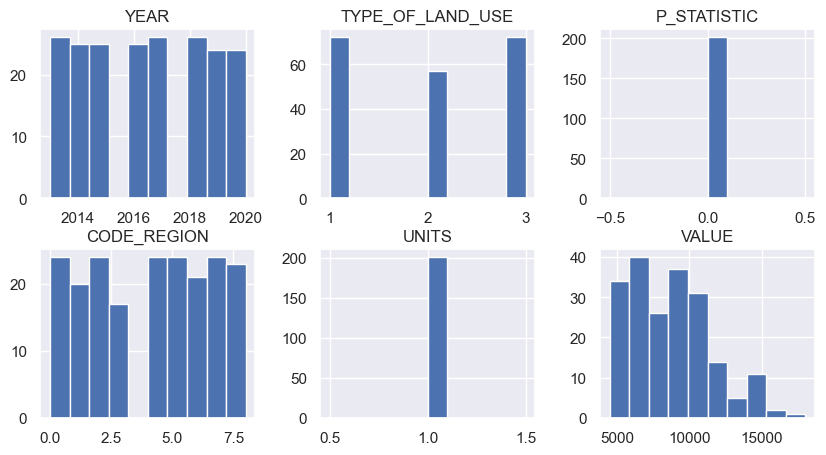

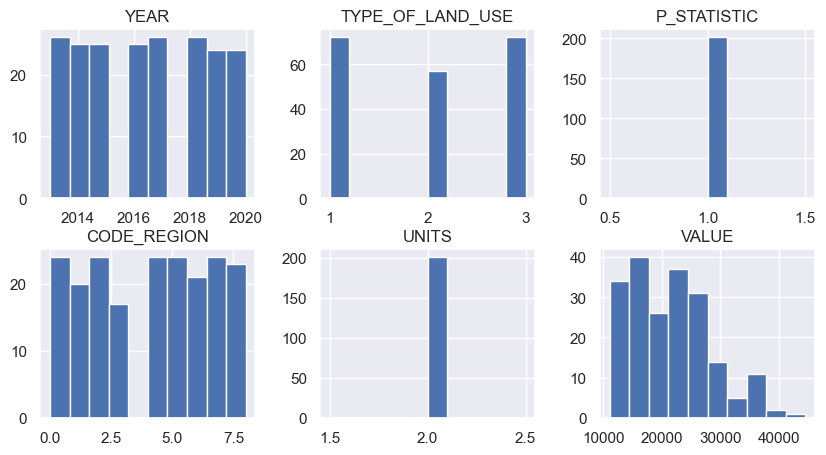

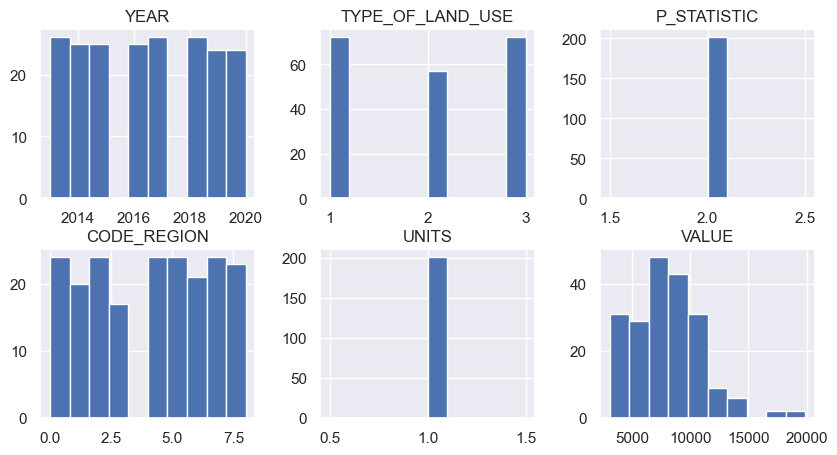

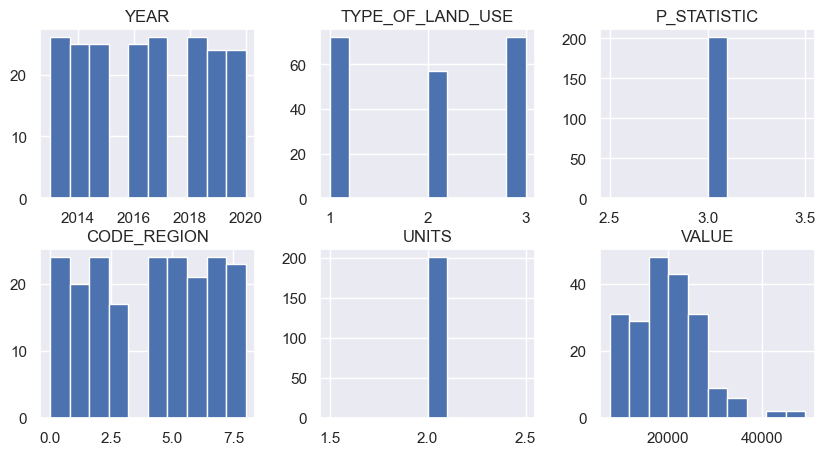

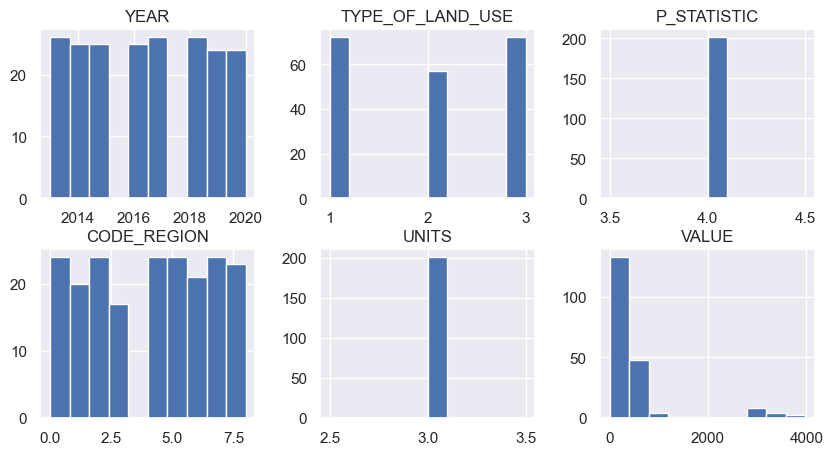

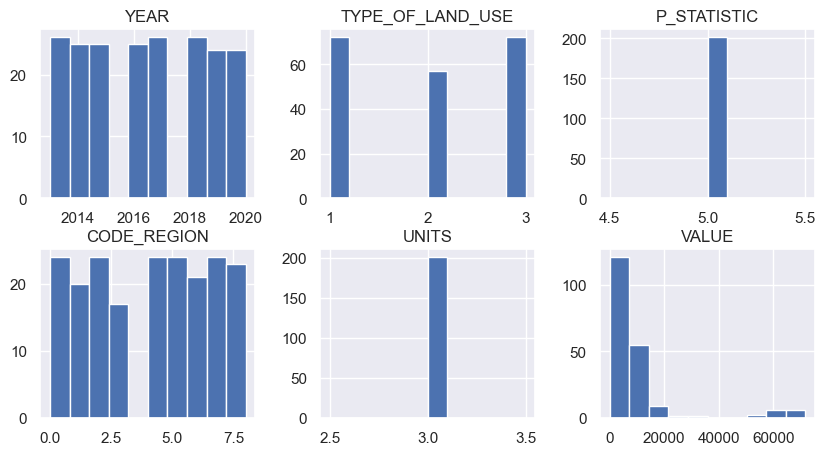

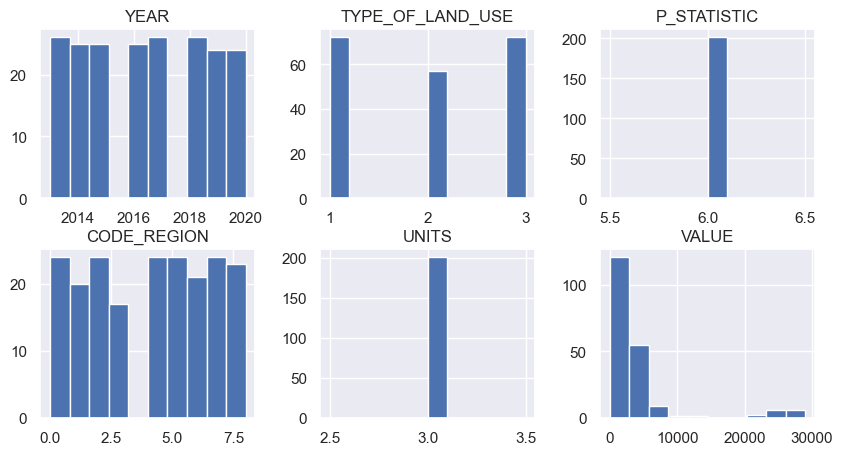

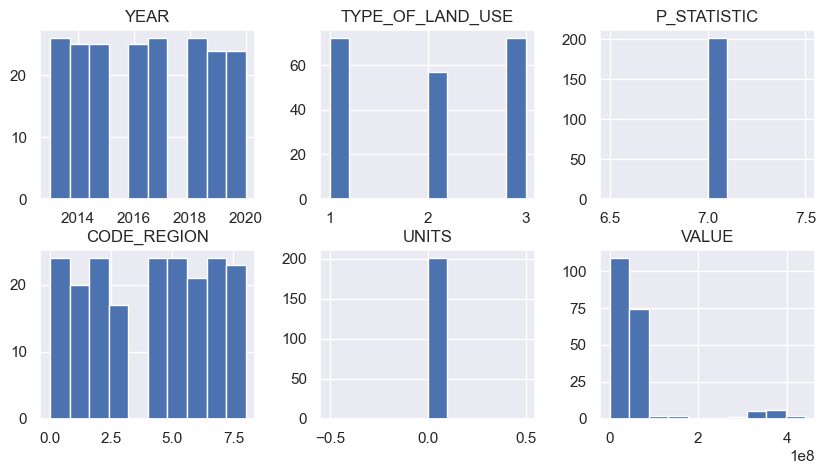

In [57]:
# generate histograms for all columns of the dataframe
new_df.hist(figsize=(10,25),layout=(9,3));

- ### Comments:
- Generate histograms, one for each column of the dataframe, help us to identify relationship between features, grouped by Statistic. 

- %matplotlib inline: is a magic command that allows us to display plots generated by Matplotlib directly in the output cells of the notebook, rather than in separate windows.

P_STATISTIC
0    AxesSubplot(0.125,0.11;0.775x0.77)
1    AxesSubplot(0.125,0.11;0.775x0.77)
2    AxesSubplot(0.125,0.11;0.775x0.77)
3    AxesSubplot(0.125,0.11;0.775x0.77)
4    AxesSubplot(0.125,0.11;0.775x0.77)
5    AxesSubplot(0.125,0.11;0.775x0.77)
6    AxesSubplot(0.125,0.11;0.775x0.77)
7    AxesSubplot(0.125,0.11;0.775x0.77)
dtype: object

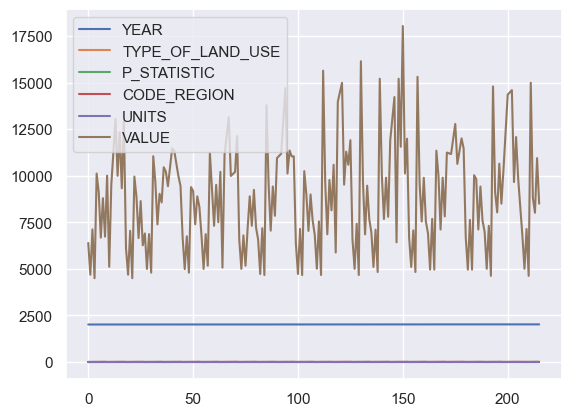

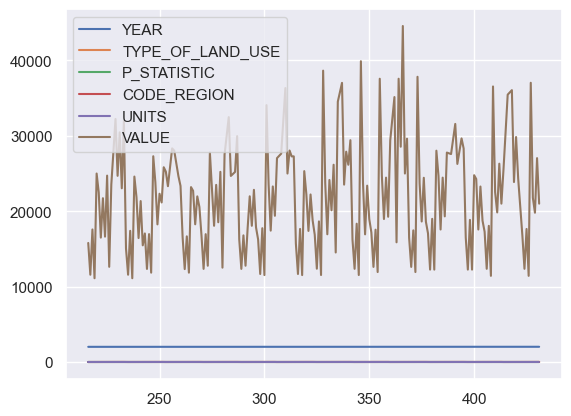

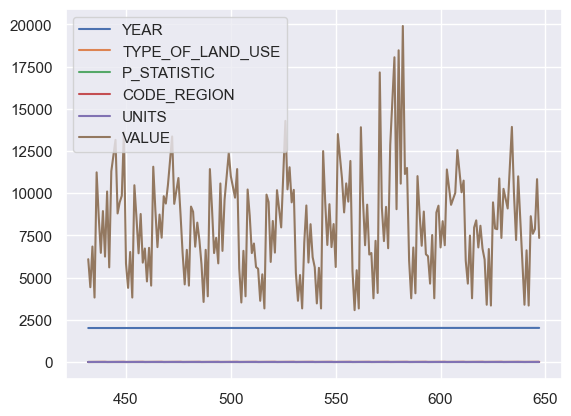

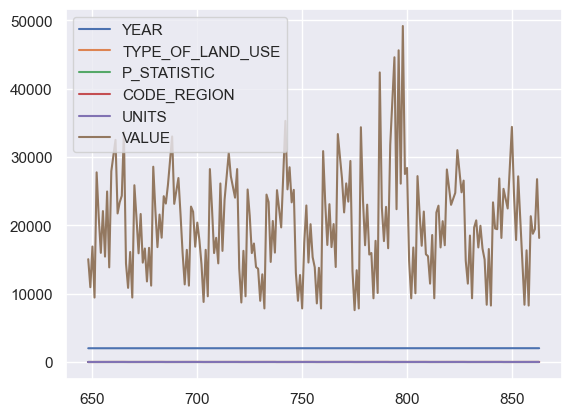

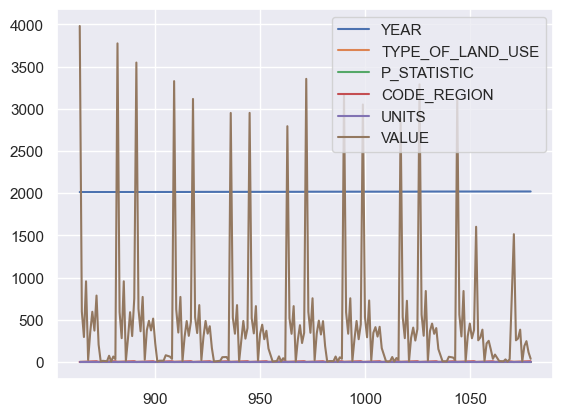

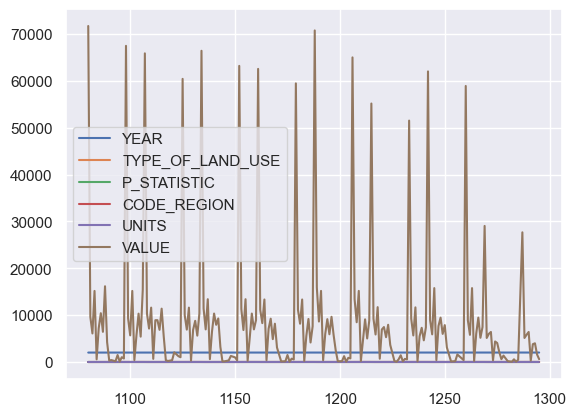

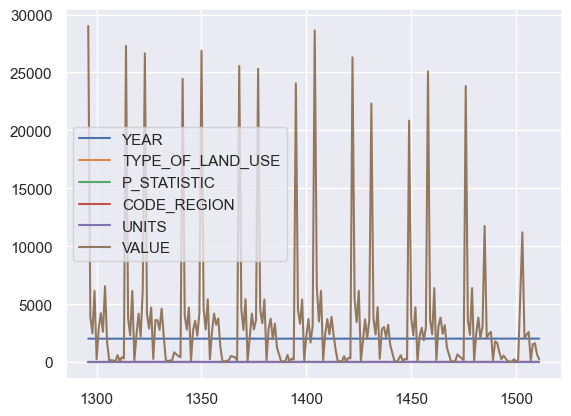

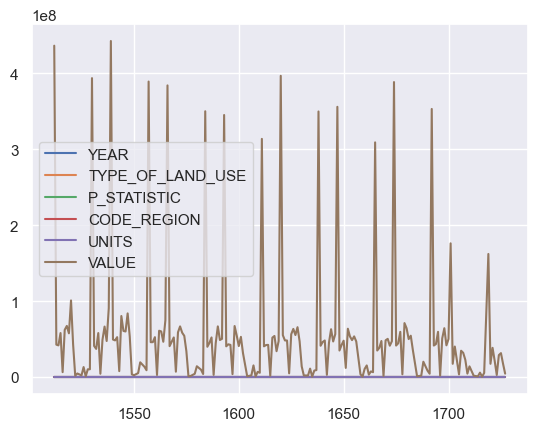

In [58]:
# generate the plots
%matplotlib inline
new_df.plot()

In [59]:
 df_TP = df

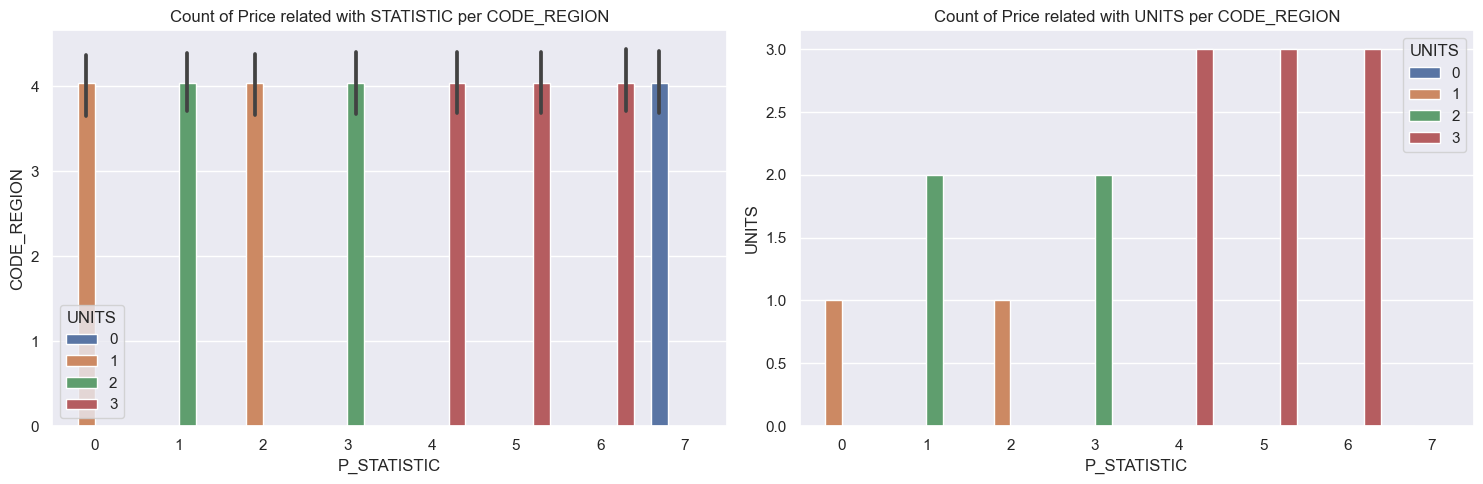

In [60]:
# Plot the distribution of our dataset
# Make a plot grid to see everything at once.
fig, ax = plt.subplots(1,2, figsize=(15,5))
# Plot each argument by using a loop
for c in range(3, 5): 
    G_Name = ["Price related with STATISTIC","Price related with UNITS"] # title variables
    ax[c-3].set_title(f"Count of {G_Name[c-3]} per CODE_REGION") # Set graph title 
    g = sns.barplot(data=df_TP, x="P_STATISTIC", y=df_TP.iloc[:,c], hue="UNITS",ax=ax[c-3]) # generate graph
    g.set_xticklabels([0,1,2,3,4,5,6,7]) # set labels
    plt.tight_layout()

- ### Comments:
We can see that our dataset exhibits positive skewed normal distribution.


## Lets create a Dashboard 

Since Pandas doesn't allow columns to be created via a new attribute name, we are going to group based on STATISCTIC, However we are going to consider just Units per Euro, in order to obtain a better result and also because for the next step, comparing Ireland with Europe the Dataset it's based in Arable Land (Unit: Hectare-Euro)

In [61]:
# select feature where the value in the 'UNITS' column is equal to 0
df[df['UNITS'] == 0]

YEAR  TYPE_OF_LAND_USE  P_STATISTIC  CODE_REGION  UNITS         VALUE
1512  2013                 1            7            0      0  4.364767e+08
1513  2013                 1            7            1      0  4.264965e+07
1514  2013                 1            7            2      0  4.166950e+07
1515  2013                 1            7            3      0  5.788785e+07
1516  2013                 1            7            4      0  6.395663e+06
...    ...               ...          ...          ...    ...           ...
1723  2020                 3            7            4      0  2.670000e+06
1724  2020                 3            7            5      0  2.886356e+07
1725  2020                 3            7            6      0  3.145546e+07
1726  2020                 3            7            7      0  1.739611e+07
1727  2020                 3            7            8      0  4.446462e+06

[201 rows x 6 columns]

In [62]:
# Make DataFrame Pipeline Interactive
idf = df.interactive()

## Value over years by Statistic (Units)

In [63]:
# Define Panel widgets
year_slider = pn.widgets.IntSlider(name='Year slider', start=2013, end=2020, step=1, value=2015)
year_slider

IntSlider(end=2020, name='Year slider', start=2013, value=2015)

In [64]:
# Radio buttons for Values
yaxis_VALUE = pn.widgets.RadioButtonGroup(
    name='Y axis', 
    options=['VALUE','CODE_REGION'],
    button_type='success'
)

In [65]:
df.group = [0]

VALUE_pipeline = (
    idf[
        (idf.YEAR <= year_slider) &
        (idf.UNITS.isin(df.group))
    ]
    .groupby(["UNITS","YEAR"])[yaxis_VALUE].mean()
    .to_frame()
    .reset_index()
    .sort_values(by="YEAR")  
    .reset_index(drop=True)
)

C:\Users\ele_9\AppData\Local\Temp\ipykernel_1664\3879894332.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.group = [0]


## Table - VALUE over YEAR by UNITS

In [66]:
VALUE_pipeline

In [67]:
VALUE_plot = VALUE_pipeline.hvplot(x ='YEAR', by='UNITS', y=yaxis_VALUE,line_width=2, title="Value in Euro for Arable Land")
VALUE_plot

In [68]:
VALUE_table = VALUE_pipeline.pipe(pn.widgets.Tabulator, pagination='remote', page_size = 10, sizing_mode='stretch_width') 
VALUE_table

## VALUE vs CODE_REGION scatterplot

In [69]:
VALUE_vs_CODE_REGION_scatterplot_pipeline = (
    idf[
        (idf.YEAR == year_slider) &
        (~ (idf.UNITS.isin(df.group)))
    ]
    .groupby(['UNITS', 'YEAR', 'CODE_REGION'])['VALUE'].mean()
    .to_frame()
    .reset_index()
    .sort_values(by='YEAR')  
    .reset_index(drop=True)
)

In [70]:
VALUE_vs_CODE_REGION_scatterplot_pipeline

In [71]:
VALUE_vs_CODE_REGION_scatterplot = VALUE_vs_CODE_REGION_scatterplot_pipeline.hvplot(x='VALUE', 
                                                                y='UNITS', 
                                                                by='CODE_REGION', 
                                                                size=80, kind="scatter", 
                                                                alpha=0.7,
                                                                legend=False, 
                                                                height=500, 
                                                                width=500)
VALUE_vs_CODE_REGION_scatterplot

### Bar chart with VALUE: Arable Land Sale Price in Euro during 2013-2020

In [72]:
yaxis_VALUE_source = pn.widgets.RadioButtonGroup(
    name='Y axis', 
    options=['CODE_REGION', 'P_STATISTIC'], 
    button_type='success'
)

df.group = [0,1,2,3]

VALUE_source_bar_pipeline = (
    idf[
        (idf.YEAR == year_slider) &
        (df.UNITS.isin(df.group))
    ]
    .groupby(['YEAR', 'UNITS'])[yaxis_VALUE_source].sum()
    .to_frame()
    .reset_index()
    .sort_values(by='YEAR')  
    .reset_index(drop=True)
)

In [73]:
VALUE_source_bar_plot = VALUE_source_bar_pipeline.hvplot(kind='bar', 
                                                     x='UNITS', 
                                                     y=yaxis_VALUE_source, 
                                                     title='Value source by UNITS')
VALUE_source_bar_plot

In [74]:
#Layout using Template
template = pn.template.FastListTemplate(
    title='Ireland Land Sale Values', 
    sidebar=[pn.pane.Markdown("# Ireland Land prices over the years"), 
             pn.pane.Markdown("#### Ireland has the fourth highest average land price in the EU, according to a new report by Eurostat. Among EU member states for which data is available, the Netherlands topped the table with an average of €69,632/ha in 2019 for arable land"), 
             pn.pane.PNG('irish-heart.png', sizing_mode='scale_both'),
             pn.pane.Markdown("## Settings"),   
             year_slider],
    main=[pn.Row(pn.Column(yaxis_VALUE, 
                           VALUE_plot.panel(width=700), margin=(0,25)), 
                 VALUE_table.panel(width=500)), 
          pn.Row(pn.Column(VALUE_vs_CODE_REGION_scatterplot.panel(width=600), margin=(0,25)), 
                 pn.Column(yaxis_VALUE_source, VALUE_source_bar_plot.panel(width=600)))],
    accent_base_color="#88d8b0",
    header_background="#88d8b0",
)
# template.show()
template.servable();

In [75]:
# Refresh our actual Dataset
df.head()

YEAR  TYPE_OF_LAND_USE  P_STATISTIC  CODE_REGION  UNITS         VALUE
0  2013                 1            0            0      1   6389.783163
1  2013                 1            0            1      1   4685.224509
2  2013                 1            0            2      1   7114.568810
3  2013                 1            0            3      1   4496.514077
4  2013                 1            0            4      1  10117.156674

## IDENTIFY TARGET VARIABLE

In [76]:
# Indentify the values for geo
df["TYPE_OF_LAND_USE"].value_counts()

1    576
3    576
2    456
Name: TYPE_OF_LAND_USE, dtype: int64

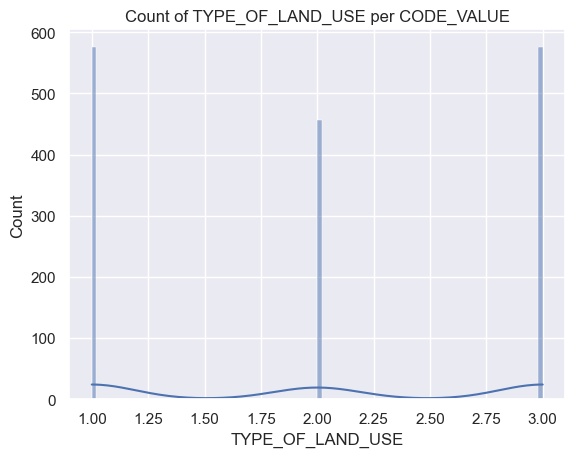

In [77]:
# Count of TYPE_OF_LAND_USE per VALUE
plt.title("Count of TYPE_OF_LAND_USE per CODE_VALUE")
sns.histplot(df.TYPE_OF_LAND_USE, kde=True, bins=100);

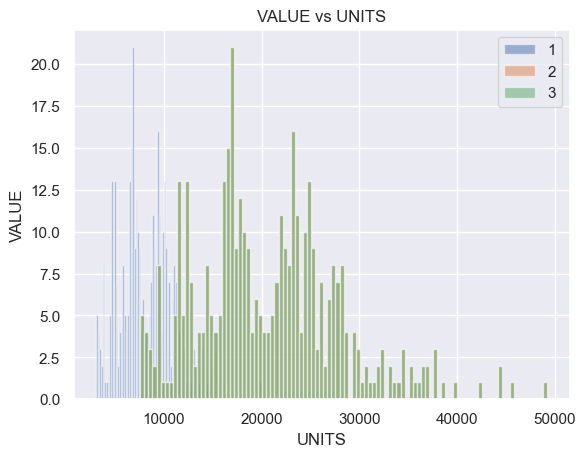

In [78]:
# VALUE vs UNITS 
plt.title("VALUE vs UNITS")
G1= df[df["UNITS"]==1] # Filter dataset by 
G1D = G1.loc[:,"VALUE"] # Filter dataset by 
G2= df[df["UNITS"]==2] # Filter dataset by
G2D = G2.loc[:,"VALUE"] # Filter dataset by S
G3= df[df["UNITS"]==3] # Filter dataset by
G3D = G2.loc[:,"VALUE"] # Filter dataset by S
plt.hist(G1D, bins=100, alpha=0.5, label=1)
plt.hist(G2D, bins=100, alpha=0.5, label=2)
plt.hist(G3D, bins=100, alpha=0.5, label=3)
plt.xlabel("UNITS", size=12)
plt.ylabel("VALUE", size=12)
plt.legend(loc='upper right')
plt.show()

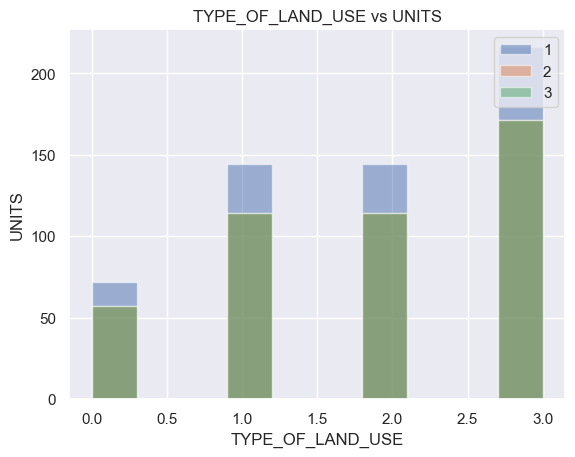

In [79]:
# TYPE_OF_LAND_USE vs UNITS 
plt.title("TYPE_OF_LAND_USE vs UNITS")
G1= df[df["TYPE_OF_LAND_USE"]==1] # Filter dataset by 
G1D = G1.loc[:,"UNITS"] # Filter dataset by 
G2= df[df["TYPE_OF_LAND_USE"]==2] # Filter dataset by
G2D = G2.loc[:,"UNITS"] # Filter dataset by S
G3= df[df["TYPE_OF_LAND_USE"]==3] # Filter dataset by
G3D = G2.loc[:,"UNITS"] # Filter dataset by S
plt.hist(G1D, bins=10, alpha=0.5, label=1)
plt.hist(G2D, bins=10, alpha=0.5, label=2)
plt.hist(G3D, bins=10, alpha=0.5, label=3)
plt.xlabel("TYPE_OF_LAND_USE", size=12)
plt.ylabel("UNITS", size=12)
plt.legend(loc='upper right')
plt.show()

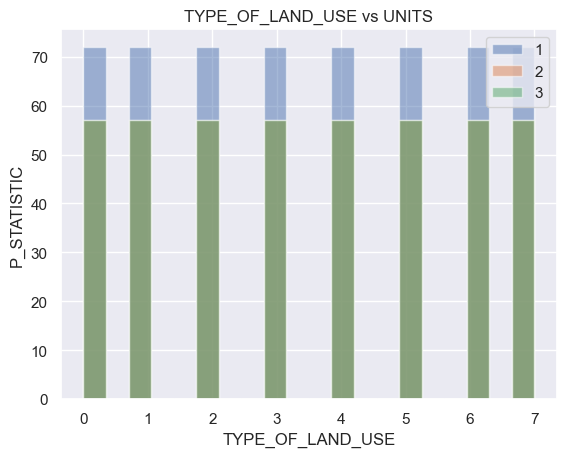

In [80]:
# TYPE_OF_LAND_USE vs P_STATISTIC 
plt.title("TYPE_OF_LAND_USE vs UNITS")
G1= df[df["TYPE_OF_LAND_USE"]==1] # Filter dataset by 
G1D = G1.loc[:,"P_STATISTIC"] # Filter dataset by 
G2= df[df["TYPE_OF_LAND_USE"]==2] # Filter dataset by
G2D = G2.loc[:,"P_STATISTIC"] # Filter dataset by S
G3= df[df["TYPE_OF_LAND_USE"]==3] # Filter dataset by
G3D = G2.loc[:,"P_STATISTIC"] # Filter dataset by S
plt.hist(G1D, bins=20, alpha=0.5, label=1)
plt.hist(G2D, bins=20, alpha=0.5, label=2)
plt.hist(G3D, bins=20, alpha=0.5, label=3)
plt.xlabel("TYPE_OF_LAND_USE", size=12)
plt.ylabel("P_STATISTIC", size=12)
plt.legend(loc='upper right')
plt.show()

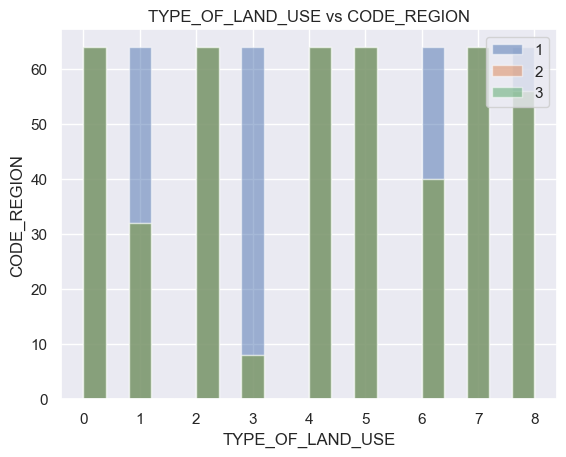

In [81]:
# TYPE_OF_LAND_USE vs CODE_REGION 
plt.title("TYPE_OF_LAND_USE vs CODE_REGION")
G1= df[df["TYPE_OF_LAND_USE"]==1] # Filter dataset by 
G1D = G1.loc[:,"CODE_REGION"] # Filter dataset by 
G2= df[df["TYPE_OF_LAND_USE"]==2] # Filter dataset by
G2D = G2.loc[:,"CODE_REGION"] # Filter dataset by S
G3= df[df["TYPE_OF_LAND_USE"]==3] # Filter dataset by
G3D = G2.loc[:,"CODE_REGION"] # Filter dataset by S
plt.hist(G1D, bins=20, alpha=0.5, label=1)
plt.hist(G2D, bins=20, alpha=0.5, label=2)
plt.hist(G3D, bins=20, alpha=0.5, label=3)
plt.xlabel("TYPE_OF_LAND_USE", size=12)
plt.ylabel("CODE_REGION", size=12)
plt.legend(loc='upper right')
plt.show()

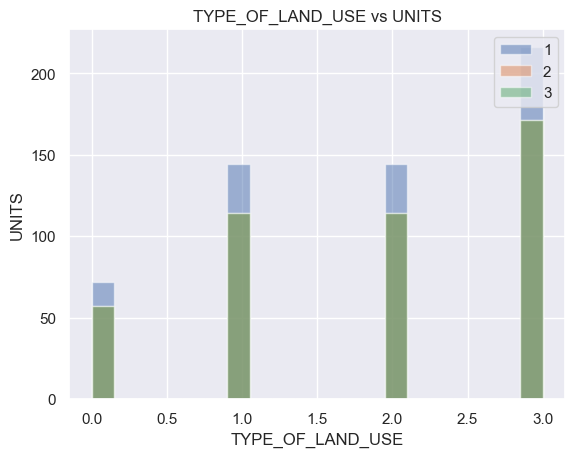

In [82]:
# TYPE_OF_LAND_USE vs UNITS 
plt.title("TYPE_OF_LAND_USE vs UNITS")
G1= df[df["TYPE_OF_LAND_USE"]==1] # Filter dataset by 
G1D = G1.loc[:,"UNITS"] # Filter dataset by 
G2= df[df["TYPE_OF_LAND_USE"]==2] # Filter dataset by
G2D = G2.loc[:,"UNITS"] # Filter dataset by S
G3= df[df["TYPE_OF_LAND_USE"]==3] # Filter dataset by
G3D = G2.loc[:,"UNITS"] # Filter dataset by S
plt.hist(G1D, bins=20, alpha=0.5, label=1)
plt.hist(G2D, bins=20, alpha=0.5, label=2)
plt.hist(G3D, bins=20, alpha=0.5, label=3)
plt.xlabel("TYPE_OF_LAND_USE", size=12)
plt.ylabel("UNITS", size=12)
plt.legend(loc='upper right')
plt.show()

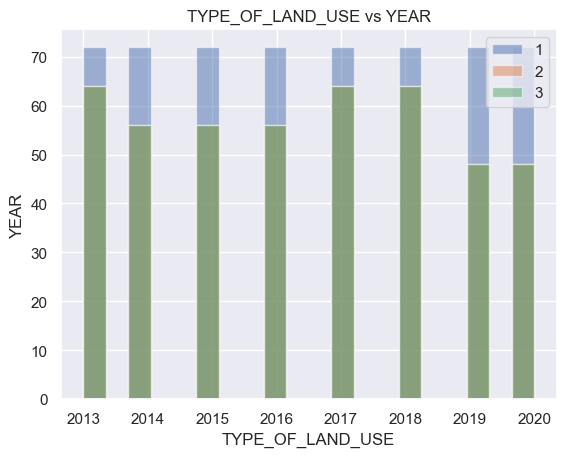

In [83]:
# TYPE_OF_LAND_USE vs UNITS 
plt.title("TYPE_OF_LAND_USE vs YEAR")
G1= df[df["TYPE_OF_LAND_USE"]==1] # Filter dataset by 
G1D = G1.loc[:,"YEAR"] # Filter dataset by 
G2= df[df["TYPE_OF_LAND_USE"]==2] # Filter dataset by
G2D = G2.loc[:,"YEAR"] # Filter dataset by S
G3= df[df["TYPE_OF_LAND_USE"]==3] # Filter dataset by
G3D = G2.loc[:,"YEAR"] # Filter dataset by S
plt.hist(G1D, bins=20, alpha=0.5, label=1)
plt.hist(G2D, bins=20, alpha=0.5, label=2)
plt.hist(G3D, bins=20, alpha=0.5, label=3)
plt.xlabel("TYPE_OF_LAND_USE", size=12)
plt.ylabel("YEAR", size=12)
plt.legend(loc='upper right')
plt.show()

# Machine learning

### Data pre-processing

### Correlation

- ### Comments:
As can be seen from the graphs, there is a strong relationship between the target variable's UNITS

### Spearman method

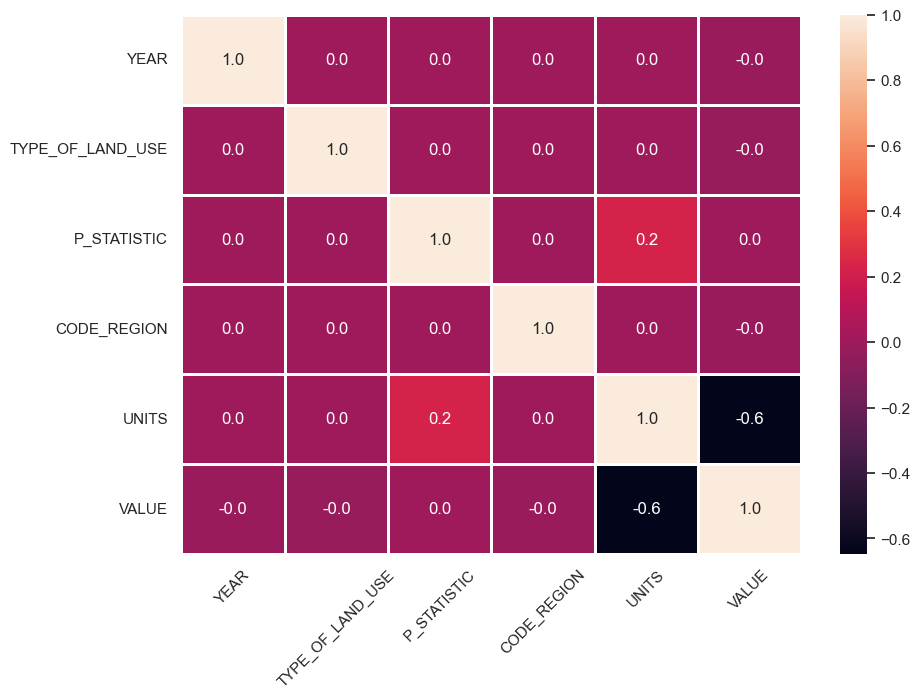

In [84]:
# correlation of the variables - Spearman method
f,ax = plt.subplots(figsize=(10,7))
sns.heatmap(df.corr(method='spearman'),annot=True,fmt=".1f",linewidths=1,ax=ax)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

In [85]:
# As we can see UNITS has a very strong relationship with VALUE, UNITS is dropped. 
# Stop_ID contains unics values that are not going to help us in Machine learning.
df.drop(columns=["UNITS"], inplace=True)

- ### Comments:
As we can notice there is  correlation between UNITS and the Target Variable, we will proceed to use One hot encoding method, this method is useful for data that has no relationship to each other.

In [86]:
# The array variables X and y hold the independent and dependent variables, 
X = df_TP.drop(columns=["TYPE_OF_LAND_USE"]).values
# Store "TYPE_OF_LAND_USE" feature into 'y'
y = df_TP["TYPE_OF_LAND_USE"].values
# Display X and y 
X, y

(array([[2.01300000e+03, 0.00000000e+00, 0.00000000e+00, 6.38978316e+03],
        [2.01300000e+03, 0.00000000e+00, 1.00000000e+00, 4.68522451e+03],
        [2.01300000e+03, 0.00000000e+00, 2.00000000e+00, 7.11456881e+03],
        ...,
        [2.02000000e+03, 7.00000000e+00, 6.00000000e+00, 3.14554650e+07],
        [2.02000000e+03, 7.00000000e+00, 7.00000000e+00, 1.73961122e+07],
        [2.02000000e+03, 7.00000000e+00, 8.00000000e+00, 4.44646200e+06]]),
 array([1, 1, 1, ..., 3, 3, 3], dtype=int64))

## Cross-validation
- Before moving forward, we will divide the dataset into test and training sets in order to build and evaluate machine learning models.

In [87]:
# Load useful libraries
from sklearn.model_selection import train_test_split

# Split the data set into Training (80%) and Testing parts (20%) 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

# Display the Number of rows and columns before (X, y) and after Splitting (X_train, X_test, y_train, y_test)
X.shape, y.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1608, 4), (1608,), (1286, 4), (322, 4), (1286,), (322,))

In [88]:
# Import necessary libraries
from sklearn.datasets import make_classification
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

# Since I will be plotting roc curve for each model the following fuction will reduce repetitive code
# roc curve and auc score
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

### Naive Bayes

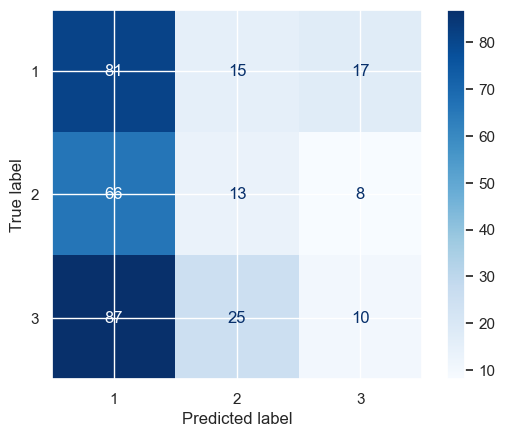

In [89]:
from sklearn.naive_bayes import BernoulliNB

model = BernoulliNB()
model.fit(X_train, y_train)
probs = model.predict(X_test) 

# Making the Confusion Matrix
ConfusionMatrixDisplay.from_estimator(model,X_test,y_test,cmap='Blues');

In [90]:
# Naive Bayes classification report
report = classification_report(y_test,probs)
print(report)

              precision    recall  f1-score   support

           1       0.35      0.72      0.47       113
           2       0.25      0.15      0.19        87
           3       0.29      0.08      0.13       122

    accuracy                           0.32       322
   macro avg       0.29      0.32      0.26       322
weighted avg       0.30      0.32      0.26       322



## Decision Tree

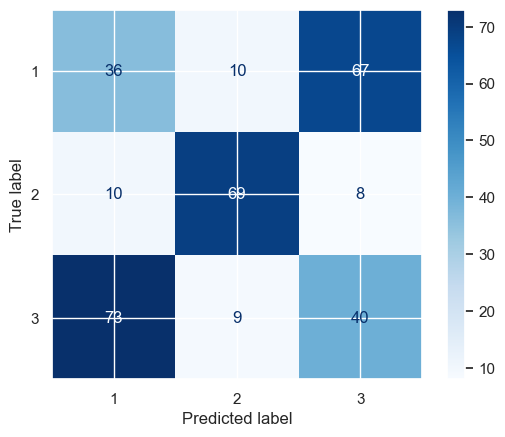

In [91]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(criterion = 'entropy', # criterio usado
                                    max_leaf_nodes = None,
                                    min_samples_split = 2,
                                    max_features = None,
                                    random_state = 0)
model.fit(X_train, y_train)
probs = model.predict(X_test)

# Making the Confusion Matrix
ConfusionMatrixDisplay.from_estimator(model,X_test,y_test,cmap='Blues');

In [92]:
# Decision Tree classification report
report = classification_report(y_test,probs)
print(report)

              precision    recall  f1-score   support

           1       0.30      0.32      0.31       113
           2       0.78      0.79      0.79        87
           3       0.35      0.33      0.34       122

    accuracy                           0.45       322
   macro avg       0.48      0.48      0.48       322
weighted avg       0.45      0.45      0.45       322



## KNN

C:\Users\ele_9\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\ele_9\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

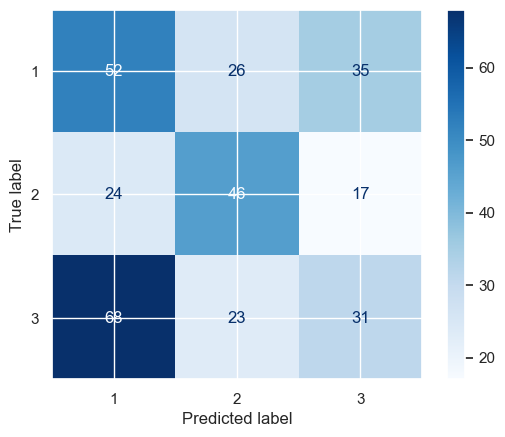

In [93]:
from sklearn.neighbors import KNeighborsClassifier
# Change: 7=5
model = KNeighborsClassifier(n_neighbors = 5, metric = 'euclidean', p =2) 
model.fit(X_train, y_train)
probs = model.predict(X_test)
# Making the Confusion Matrix
ConfusionMatrixDisplay.from_estimator(model,X_test,y_test,cmap='Blues');

In [94]:
# KNN classification report
report = classification_report(y_test,probs)
print(report)

              precision    recall  f1-score   support

           1       0.36      0.46      0.40       113
           2       0.48      0.53      0.51        87
           3       0.37      0.25      0.30       122

    accuracy                           0.40       322
   macro avg       0.41      0.41      0.40       322
weighted avg       0.40      0.40      0.39       322



## Random Forest

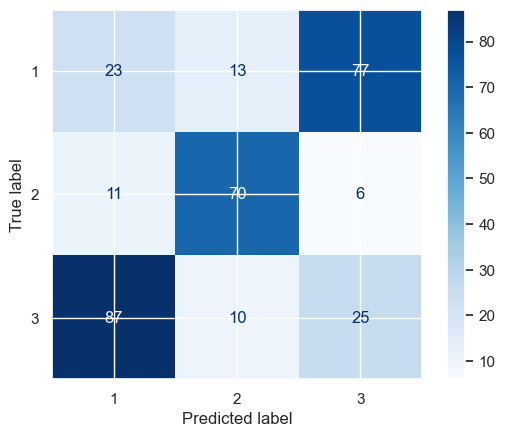

In [95]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators = 100, random_state = 0)
model.fit(X_train, y_train)
probs = model.predict(X_test)

# Making the Confusion Matrix
ConfusionMatrixDisplay.from_estimator(model,X_test,y_test,cmap='Blues');

In [96]:
# Random forest classification report
report = classification_report(y_test,probs)
print(report)

              precision    recall  f1-score   support

           1       0.19      0.20      0.20       113
           2       0.75      0.80      0.78        87
           3       0.23      0.20      0.22       122

    accuracy                           0.37       322
   macro avg       0.39      0.40      0.40       322
weighted avg       0.36      0.37      0.36       322



- ### Comments: 
It is important to consider the characteristics of the data when choosing a machine learning model. Continuous features typically require more precise models because they can take on a wide range of values. If the models you trained on the previous dataset did not perform as well as you hoped, it may be worth trying a different type of model or fine-tuning the hyperparameters of the model to see if you can improve its performance. It is also worth considering whether the features in your dataset are appropriate for the problem you are trying to solve and whether you have sufficient data to train a reliable model. It may be necessary to gather more data or transform the existing data in some way to improve model performance.

## Let's start with the comparison between Ireland and Europe

In [97]:
df_C = pd.read_csv("apri_lprc__custom_4355786_linear.csv.gz")

In [98]:
df_C.head()

DATAFLOW        LAST UPDATE freq    unit agriprod geo  \
0  ESTAT:APRI_LPRC(1.0)  21/12/22 11:00:00    A  EUR_HA      ARA  BE   
1  ESTAT:APRI_LPRC(1.0)  21/12/22 11:00:00    A  EUR_HA      ARA  BE   
2  ESTAT:APRI_LPRC(1.0)  21/12/22 11:00:00    A  EUR_HA      ARA  BG   
3  ESTAT:APRI_LPRC(1.0)  21/12/22 11:00:00    A  EUR_HA      ARA  BG   
4  ESTAT:APRI_LPRC(1.0)  21/12/22 11:00:00    A  EUR_HA      ARA  BG   

   TIME_PERIOD  OBS_VALUE OBS_FLAG  
0         2013      36591        e  
1         2014      38496        e  
2         2013       3175      NaN  
3         2014       3620      NaN  
4         2015       3891      NaN

In [99]:
df_C["OBS_VALUE"]

0      36591
1      38496
2       3175
3       3620
4       3891
       ...  
169    26634
170    30292
171    25730
172    23450
173    23412
Name: OBS_VALUE, Length: 174, dtype: int64

In [100]:
df_C.isnull().sum()

DATAFLOW         0
LAST UPDATE      0
freq             0
unit             0
agriprod         0
geo              0
TIME_PERIOD      0
OBS_VALUE        0
OBS_FLAG       148
dtype: int64

In [101]:
df_C.count()

DATAFLOW       174
LAST UPDATE    174
freq           174
unit           174
agriprod       174
geo            174
TIME_PERIOD    174
OBS_VALUE      174
OBS_FLAG        26
dtype: int64

In [102]:
# Indentify the values for geo
df_C["geo"].value_counts()

IE    8
SI    8
RO    8
PL    8
NL    8
LV    8
LU    8
LT    8
IT    8
BG    8
HU    8
SK    8
FR    8
FI    8
ES    8
EL    8
EE    8
DK    8
CZ    8
SE    8
UK    6
HR    6
BE    2
Name: geo, dtype: int64

In [103]:
# Indentify the values for OBS_VALUE
df_C["OBS_VALUE"].value_counts()

18752    2
6000     2
4182     2
36591    1
3856     1
        ..
5770     1
5940     1
6070     1
6030     1
23412    1
Name: OBS_VALUE, Length: 171, dtype: int64

In [104]:
# Indentify the values for OBS_FLAG
df_C["OBS_FLAG"].value_counts()

e    18
b     5
d     3
Name: OBS_FLAG, dtype: int64

In [105]:
# Indentify the values for OBS_VALUE
df_C["freq"].value_counts()

A    174
Name: freq, dtype: int64

In [106]:
# Indentify the values for TIME PERIOD
df_C["TIME_PERIOD"].value_counts()

2013    22
2014    22
2015    22
2016    22
2017    22
2018    22
2019    21
2020    21
Name: TIME_PERIOD, dtype: int64

In [107]:
# Indentify the values for unit
df_C["unit"].value_counts()

EUR_HA    174
Name: unit, dtype: int64

In [108]:
# Indentify the values for agriprod
df_C["agriprod"].value_counts()

ARA    174
Name: agriprod, dtype: int64

In [109]:
df_C.describe()

TIME_PERIOD    OBS_VALUE
count   174.000000    174.00000
mean   2016.465517  14598.54023
std       2.287555  14997.00235
min    2013.000000   1653.00000
25%    2014.250000   4128.00000
50%    2016.000000   8697.00000
75%    2018.000000  18679.00000
max    2020.000000  71225.00000

In [111]:
df_C.tail(100)

DATAFLOW        LAST UPDATE freq    unit agriprod geo  \
74   ESTAT:APRI_LPRC(1.0)  21/12/22 11:00:00    A  EUR_HA      ARA  HU   
75   ESTAT:APRI_LPRC(1.0)  21/12/22 11:00:00    A  EUR_HA      ARA  HU   
76   ESTAT:APRI_LPRC(1.0)  21/12/22 11:00:00    A  EUR_HA      ARA  HU   
77   ESTAT:APRI_LPRC(1.0)  21/12/22 11:00:00    A  EUR_HA      ARA  HU   
78   ESTAT:APRI_LPRC(1.0)  21/12/22 11:00:00    A  EUR_HA      ARA  HU   
..                    ...                ...  ...     ...      ...  ..   
169  ESTAT:APRI_LPRC(1.0)  21/12/22 11:00:00    A  EUR_HA      ARA  UK   
170  ESTAT:APRI_LPRC(1.0)  21/12/22 11:00:00    A  EUR_HA      ARA  UK   
171  ESTAT:APRI_LPRC(1.0)  21/12/22 11:00:00    A  EUR_HA      ARA  UK   
172  ESTAT:APRI_LPRC(1.0)  21/12/22 11:00:00    A  EUR_HA      ARA  UK   
173  ESTAT:APRI_LPRC(1.0)  21/12/22 11:00:00    A  EUR_HA      ARA  UK   

     TIME_PERIOD  OBS_VALUE OBS_FLAG  
74          2015       3356      NaN  
75          2016       4182      NaN  
76          2017       4368      NaN  
77          2018       4662      NaN  
78          2019       4862      NaN  
..           ...        ...      ...  
169         2014      26634        e  
170         2015      30292        e  
171         2016      25730        e  
172         2017      23450        e  
173         2018      23412      NaN  

[100 rows x 9 columns]

### One-sample t-tests

The statistic value is the test statistic, which in this case is -134575.1141047803. The pvalue is the p-value, which is the probability of obtaining a test statistic at least as extreme as the one that was observed, given that the null hypothesis is true. In this case, the p-value is 0.0, which suggests that the sample mean is significantly different from the population mean.

It's important to note that the p-value alone does not indicate the size or direction of the difference between the sample and population means. To determine this, you would need to compare the sample mean to the population mean and consider the magnitude of the t-statistic.

We can also use the p-value to determine the strength of the evidence against the null hypothesis. A small p-value (generally less than 0.05) indicates that there is strong evidence against the null hypothesis, while a large p-value (greater than 0.05) indicates that there is not enough evidence to reject the null hypothesis.

1. State the null ($H_0$) and alternative ($H_A$) hypotheses.

$H_0: \mu = 65400$ vs. $H_A: \mu \neq 65400$

Level of significance $\alpha = 0.05$. 

In [139]:
df_C2 = pd.read_csv("apri_lprc__custom_4355786_linear.csv.gz")

C:\Users\ele_9\AppData\Local\Temp\ipykernel_1664\778201703.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels([2013,2014,2015,2016,2017,2018,2019,2020]) # set labels
C:\Users\ele_9\AppData\Local\Temp\ipykernel_1664\778201703.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels([2013,2014,2015,2016,2017,2018,2019,2020]) # set labels


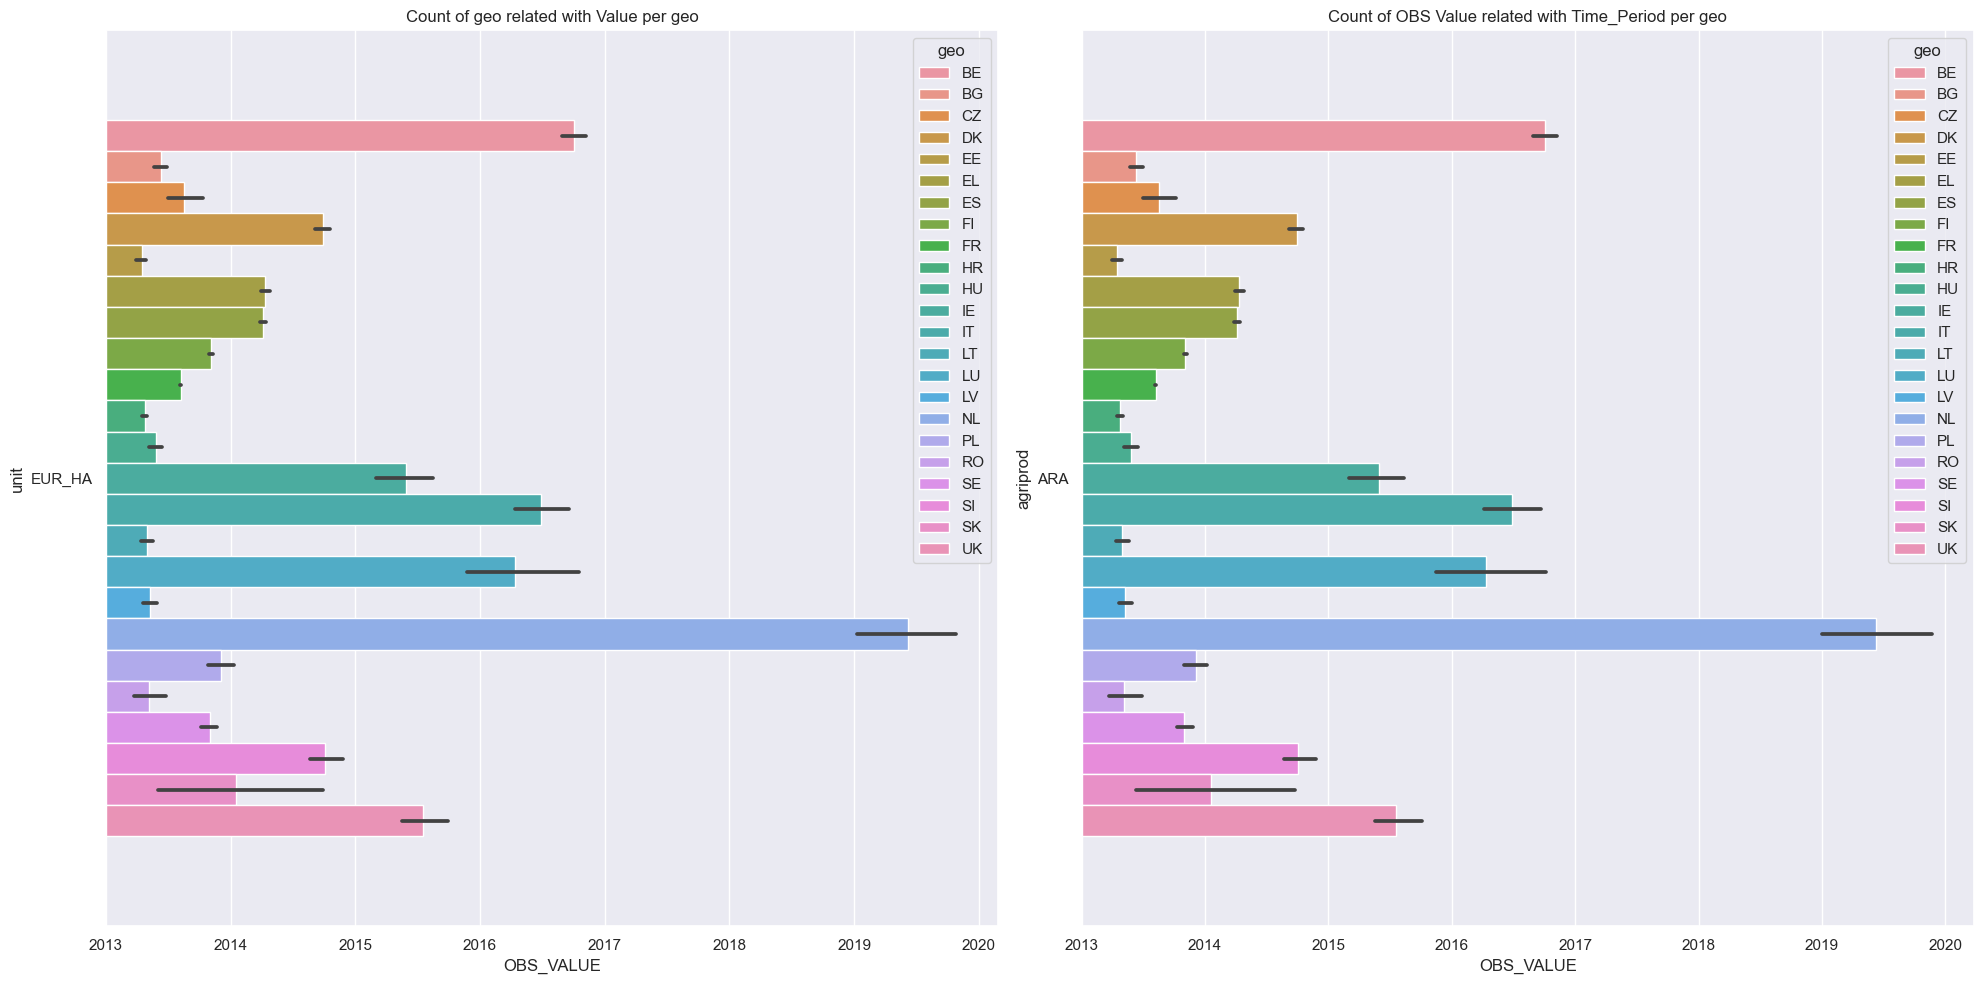

In [143]:
# Plot the distribution of our dataset
fig, ax = plt.subplots(1,2, figsize=(20,10)) 
for c in range(3, 5): # Plot each argument by using a loop
    G_Name = ["geo related with Value","OBS Value related with Time_Period"] 
    ax[c-3].set_title(f"Count of {G_Name[c-3]} per geo") # Set graph title 
    g = sns.barplot(data=df_C2, x="OBS_VALUE", y=df_C2.iloc[:,c], hue="geo",ax=ax[c-3])
    g.set_xticklabels([2013,2014,2015,2016,2017,2018,2019,2020]) # set labels
    plt.tight_layout()

In [141]:
import scipy.stats as st
import math

def Confidence_interval(q,size,df,mean,std):
    t_critical = st.t.ppf(q=q, df_C2=df_C2) # Get the t-critical value
    sigma = std/math.sqrt(size)
    margin_of_error = t_critical * sigma
    confidence_interval = (mean - margin_of_error,
                           mean + margin_of_error)
    print("t-critical value:")
    print(t_critical)
    print("Confidence interval:")
    print(confidence_interval)

In [142]:
# Generate an array of 40 values that follow a N(30, 5) distribution
from numpy import random
random.seed(13)
out = random.normal(loc=30, scale=5, size=40)
out

array([26.43804669, 33.76883189, 29.77748461, 32.25906169, 36.72550854,
       32.66168944, 36.7509395 , 34.30605687, 37.39342869, 24.77311435,
       26.05505488, 23.69197027, 32.81423393, 28.78336874, 34.56870352,
       31.58675461, 30.6365164 , 40.75191484, 33.03144328, 29.86614175,
       25.07919609, 35.95352636, 34.76415306, 24.56409205, 29.27394334,
       31.18928919, 21.80453294, 28.60932742, 36.9961921 , 21.92446018,
       32.45435916, 39.46371109, 26.89510149, 27.73123809, 31.0872583 ,
       32.57164428, 31.98620663, 22.43577442, 26.17983015, 30.50634893])

In [144]:
out.mean()

30.702761244394896

In [145]:
from scipy import stats

# Run the test:
stats.ttest_1samp(out, popmean=30)

Ttest_1sampResult(statistic=0.9174340472708916, pvalue=0.3645541759696719)

In [146]:
# We need to evaluate (xbar - mu) / SE
# or written out fully, (xbar - mu) / (s / sqrt(n))
import math
import statistics
xbar = out.mean()
s = statistics.stdev(out)
n = len(out)
mu = 30
(xbar - mu) / (s / math.sqrt(n))

0.9174340472708916

Good! The output is the same.

5. Summarise the results.

Given our observed data (and with a significance level of $\alpha=0.05$), we do not have enough evidence that the population mean $\mu$ is different from 30.

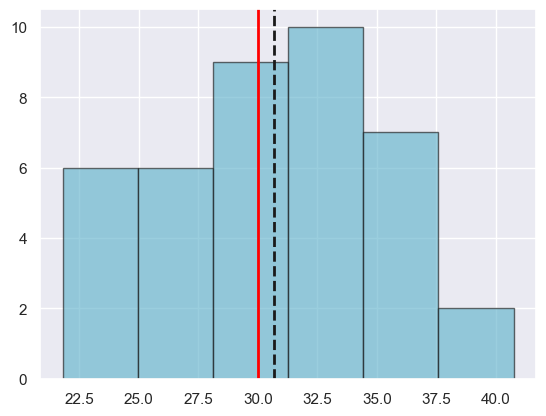

In [147]:
# Producing a plot of the data:
import matplotlib.pyplot as plt
result = plt.hist(out, bins=6, color='c', edgecolor='k', alpha=0.65)
plt.axvline(out.mean(), color='k', linestyle='dashed', linewidth=2) # Sample mean
plt.axvline(mu, color='red', linestyle='solid', linewidth=2) # Hypothesised mu

What about one-tailed tests?

In that case, remember that  𝐻𝐴  will be different. For example, if we believe that the mean has increased from the previous study, and we want to test that hypothesis:

𝐻0:𝜇=30  vs.  𝐻𝐴:𝜇>30

In [148]:
# We just need to run:
from scipy import stats
stats.ttest_1samp(out, popmean=30, alternative = "greater")

Ttest_1sampResult(statistic=0.9174340472708916, pvalue=0.18227708798483594)

In [149]:
import numpy as np
random.seed(13)
rvs = random.normal(size=(100, 50), loc = 30, scale = 5)
res = stats.ttest_1samp(rvs, popmean=30, axis=1)
np.sum(res.pvalue < 0.05)

5

In [150]:
# Create a function to glimpse the data
def glimpse(df):
    print(f"{df.shape[0]} rows and {df_c2.shape[1]} columns")
    display(df.head())
    display(df.tail())
data=(df_C2)

<AxesSubplot: xlabel='TIME_PERIOD', ylabel='OBS_VALUE'>

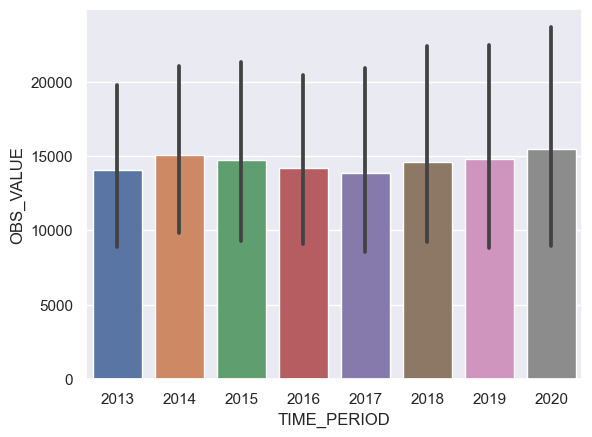

In [152]:
sns.barplot(data=df_C2, x="TIME_PERIOD", y='OBS_VALUE')

A confidence interval is a range of values that is calculated from a sample data set. It is used to indicate the level of uncertainty associated with a sample estimate of a population parameter. In this case, the confidence interval is given as (12354.520488459446, 16842.559971310668). This means that there is a certain level of confidence (typically expressed as a percentage) that the true population parameter falls within this range. The level of confidence is usually set at 95% by convention, although it can be any value between 0% and 100%.

For example, if the true population mean is within this confidence interval, we can be 95% confident that the sample mean is an accurate estimate of the population mean. The size of the confidence interval depends on the sample size and the level of confidence. The larger the sample size, the smaller the confidence interval, and the more precise the estimate of the population parameter.

In [153]:
# Run the test:
st.ttest_1samp(df_C2['OBS_VALUE'], popmean=65400)

Ttest_1sampResult(statistic=-44.68341490719454, pvalue=6.224925100168081e-97)

Given our observed data (and with a significance level of  𝛼=0.05 ), we do not have enough evidence that the population mean  𝜇  is different from 65400

### Two-sample t-tests

For this test we will assume that we do not know where the data comes from and we will compare CB2BB with CB2DB.

In [154]:
# Perform the two-sample t-test:
st.ttest_ind(a=df_C['VALUE'], b=df_C2['OBS_VALUE'], equal_var=False)

Ttest_indResult(statistic=0.0, pvalue=1.0)

If we have conducted a hypothesis test and obtained a p-value that is less than the significance level (alpha, 𝛼) of 0.05, then you can conclude that there is sufficient evidence to reject the null hypothesis. This means that the observed difference between the means of the two cohorts is statistically significant, and you can conclude that the population means for the two groups differ.

However, it is important to note that a statistically significant difference does not necessarily imply a practical or meaningful difference. The means of the two groups are different, it does not necessarily mean that the difference is important or relevant in the context of your study. It is always important to consider the magnitude of the difference in addition to the statistical significance when interpreting the results of a hypothesis test.

## One-sample  𝜒2  tests

In [155]:
import scipy.stats as st
import math


def Confidence_interval(q,size,df_C,mean,std):
    t_critical = st.t.ppf(q=q, df_C=df_C) # Get the t-critical value
    sigma = std/math.sqrt(size)
    margin_of_error = t_critical * sigma
    confidence_interval = (mean - margin_of_error,
                           mean + margin_of_error)
    print("t-critical value:")
    print(t_critical)
    print("Confidence interval:")
    print(confidence_interval)

In [157]:
# One-sample chi-square test
from scipy.stats import chisquare
from collections import Counter
# Convert to frequencies
counter = Counter(df_C2['geo'])
frequencies = [count for count in counter.values()]
print(frequencies)

[2, 8, 8, 8, 8, 8, 8, 8, 8, 6, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 6]


<AxesSubplot: xlabel='TIME_PERIOD', ylabel='OBS_VALUE'>

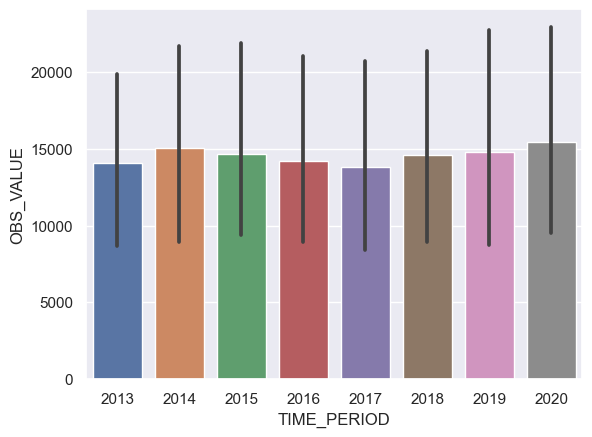

In [158]:
sns.barplot(data=df_C2, x="TIME_PERIOD", y='OBS_VALUE')

In [159]:
xbar = df_C['VALUE'].mean()
s = df_C['VALUE'].std()
st.kstest(df_C['VALUE'], 'norm',args = (xbar, s))

KstestResult(statistic=0.1970071281413488, pvalue=2.1553641074247375e-06)

In [160]:
TC_df = df_C

In [161]:
# Running the test:
st.ks_2samp(df_C2['OBS_VALUE'], TC_df['VALUE'])

KstestResult(statistic=0.0, pvalue=1.0)

## Defining variables

- DATAFLOW: Categorical variable, Unique Variable "ESTAT:APRI_LPRC(1.0)"

- LAST UPDATE: Categorical variable, Refering to Date and Time..

- freq: Categorical variable, Unique Variable "A"

- unit: Categorical variable, Unique Variable = Unique Variable "EUR_HA" in regards to the unit consider Euro per Hectare

- agriprod: Categorical variable, Unique Variable = Unique Variable "ARA" in regards to the type of land.

- TIME_PERIOD: Numerical Variable, Variable = min 2013, max 2020.

- OBS_VALUE: Numerical Variable, Variable = min 1653.00000, max 71225.00000.

- OBS_FLAG: Categorical variable, The variable contains just 2 categories.

In [112]:
# After exploring every column and feature we decide to drop the columns with unic values, which are not providing any adicional value to the analysis. 

df_C.drop(columns=["DATAFLOW", "LAST UPDATE", "freq", "OBS_FLAG", "unit", "agriprod"], inplace=True) 

In [113]:
df_C.dtypes

geo            object
TIME_PERIOD     int64
OBS_VALUE       int64
dtype: object

In [114]:
df_C["geo"]

0      BE
1      BE
2      BG
3      BG
4      BG
       ..
169    UK
170    UK
171    UK
172    UK
173    UK
Name: geo, Length: 174, dtype: object

In [ ]:
df_C["GEO"] = le.fit_transform(df_C.geo)

In [117]:
df_C["geo"]

0       0
1       0
2       1
3       1
4       1
       ..
169    22
170    22
171    22
172    22
173    22
Name: geo, Length: 174, dtype: int32

In [116]:
df_C.head(100)

geo  TIME_PERIOD  OBS_VALUE
0     0         2013      36591
1     0         2014      38496
2     1         2013       3175
3     1         2014       3620
4     1         2015       3891
..  ...          ...        ...
95   12         2020      35447
96   13         2013       2009
97   13         2014       2330
98   13         2015       3089
99   13         2016       3516

[100 rows x 3 columns]

In [118]:
# Let's rename the columns to avoid spaces, also It will help us with our analysis. 
df_C = df_C.rename(columns={"geo": "COUNTRY", "OBS_VALUE": "VALUE"})

In [119]:
# Checking updates for Nun Values
df_C.isnull().sum()

COUNTRY        0
TIME_PERIOD    0
VALUE          0
dtype: int64

In [120]:
df_C.describe()

COUNTRY  TIME_PERIOD        VALUE
count  174.000000   174.000000    174.00000
mean    11.275862  2016.465517  14598.54023
std      6.409331     2.287555  14997.00235
min      0.000000  2013.000000   1653.00000
25%      6.000000  2014.250000   4128.00000
50%     11.000000  2016.000000   8697.00000
75%     17.000000  2018.000000  18679.00000
max     22.000000  2020.000000  71225.00000

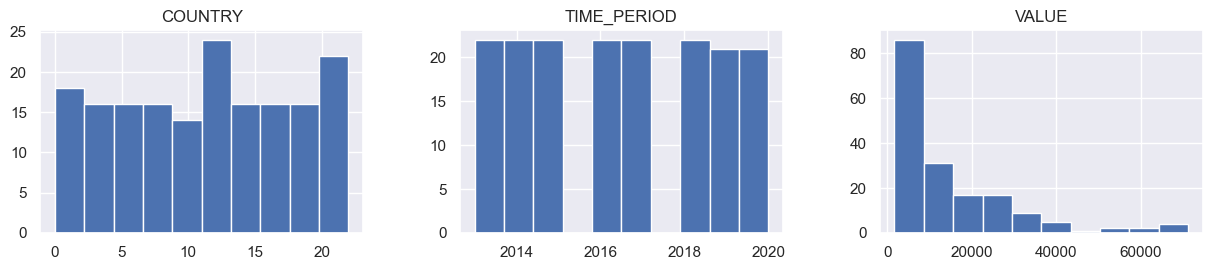

In [121]:
df_C.hist(figsize=(15,30),layout=(9,3));

## Let's start scaling the Feature VALUE

In [122]:
df_C["minmax"]=preproc.minmax_scale(df_C[["VALUE"]])

In [123]:
# Indentify the values for Statistic
df_C["minmax"].value_counts()

0.245774    2
0.062482    2
0.036351    2
0.502185    1
0.031665    1
           ..
0.059176    1
0.061620    1
0.063488    1
0.062913    1
0.312755    1
Name: minmax, Length: 171, dtype: int64

In [124]:
df_C["minmax"]

0      0.502185
1      0.529566
2      0.021877
3      0.028273
4      0.032168
         ...   
169    0.359067
170    0.411645
171    0.346073
172    0.313301
173    0.312755
Name: minmax, Length: 174, dtype: float64

In [125]:
df_C["standardized"]=preproc.StandardScaler().fit_transform(df_C[["VALUE"]])

In [126]:
df_C["standardized"].value_counts()

 0.277752    2
-0.575005    2
-0.696579    2
 1.470689    1
-0.718380    1
            ..
-0.590386    1
-0.579018    1
-0.570324    1
-0.572999    1
 0.589377    1
Name: standardized, Length: 171, dtype: int64

In [127]:
df_C["l2_normalized"]= preproc.normalize(df_C[["VALUE"]], axis=0)

In [128]:
df_C["l2_normalized"].value_counts()

0.068024    2
0.021765    2
0.015171    2
0.132737    1
0.013988    1
           ..
0.020931    1
0.021548    1
0.022019    1
0.021874    1
0.084929    1
Name: l2_normalized, Length: 171, dtype: int64

## Let's confirm that we are presenting the same information, without afecting the real values.

Text(85.0, 0.5, 'Number of articles')

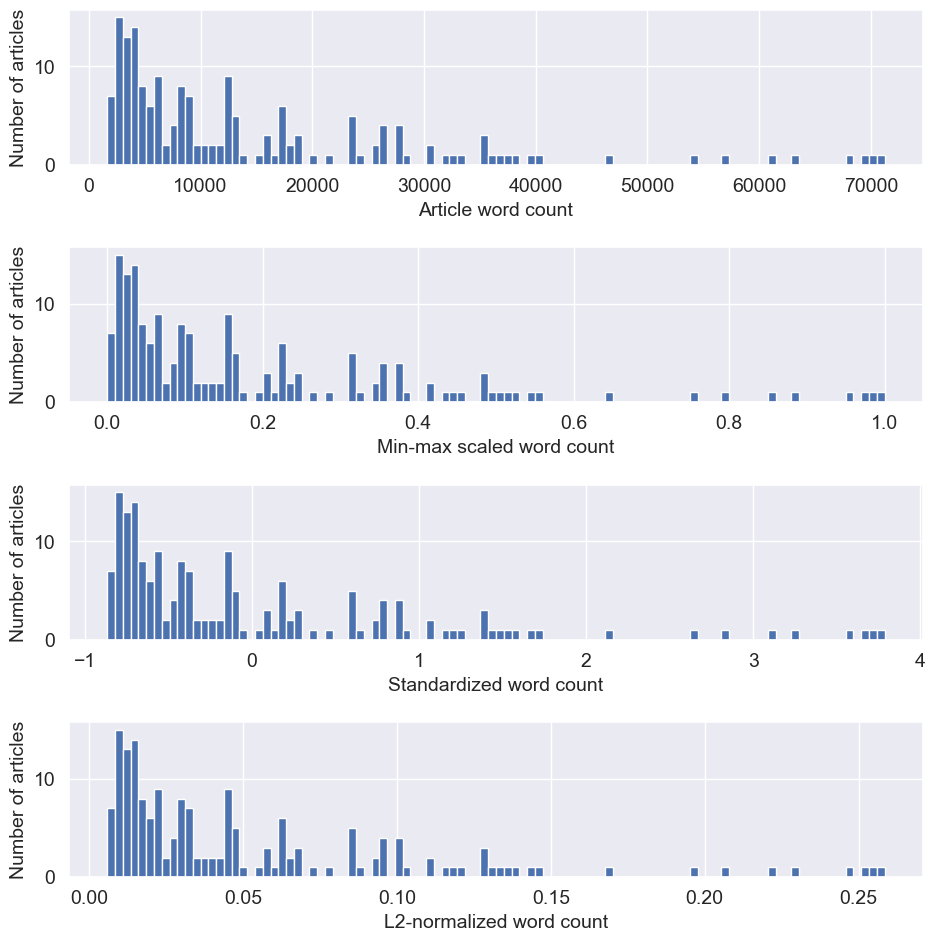

In [129]:
import matplotlib.pyplot as plt

fig, (ax1, ax2, ax3, ax4) = plt.subplots(4,1,figsize=(10, 10))
fig.tight_layout(pad=3.0)
df_C['VALUE'].hist(ax=ax1, bins=100)
ax1.tick_params(labelsize=14)
ax1.set_xlabel('Article word count', fontsize=14)
ax1.set_ylabel('Number of articles', fontsize=14)

df_C['minmax'].hist(ax=ax2, bins=100)
ax2.tick_params(labelsize=14)
ax2.set_xlabel('Min-max scaled word count', fontsize=14)
ax2.set_ylabel('Number of articles', fontsize=14)

df_C['standardized'].hist(ax=ax3, bins=100)
ax3.tick_params(labelsize=14)
ax3.set_xlabel('Standardized word count', fontsize=14)
ax3.set_ylabel('Number of articles', fontsize=14)

df_C['l2_normalized'].hist(ax=ax4, bins=100)
ax4.tick_params(labelsize=14)
ax4.set_xlabel('L2-normalized word count', fontsize=14)
ax4.set_ylabel('Number of articles', fontsize=14)

In [130]:
df_C.dtypes

COUNTRY            int32
TIME_PERIOD        int64
VALUE              int64
minmax           float64
standardized     float64
l2_normalized    float64
dtype: object

In [131]:
df_C.head()

COUNTRY  TIME_PERIOD  VALUE    minmax  standardized  l2_normalized
0        0         2013  36591  0.502185      1.470689       0.132737
1        0         2014  38496  0.529566      1.598081       0.139647
2        1         2013   3175  0.021877     -0.763920       0.011518
3        1         2014   3620  0.028273     -0.734162       0.013132
4        1         2015   3891  0.032168     -0.716039       0.014115

In [132]:
df_C.describe()

COUNTRY  TIME_PERIOD        VALUE      minmax  standardized  \
count  174.000000   174.000000    174.00000  174.000000  1.740000e+02   
mean    11.275862  2016.465517  14598.54023    0.186074  6.508204e-17   
std      6.409331     2.287555  14997.00235    0.215561  1.002886e+00   
min      0.000000  2013.000000   1653.00000    0.000000 -8.656997e-01   
25%      6.000000  2014.250000   4128.00000    0.035575 -7.001905e-01   
50%     11.000000  2016.000000   8697.00000    0.101248 -3.946503e-01   
75%     17.000000  2018.000000  18679.00000    0.244725  2.728703e-01   
max     22.000000  2020.000000  71225.00000    1.000000  3.786749e+00   

       l2_normalized  
count     174.000000  
mean        0.052957  
std         0.054403  
min         0.005996  
25%         0.014975  
50%         0.031549  
75%         0.067759  
max         0.258374

In [133]:
df_C.shape

(174, 6)

In [134]:
land_sale_Europe = df_C

In [135]:
# print records for each value of the feature 'VALUE'
df_2020 = land_sale_Europe[(land_sale_Europe.TIME_PERIOD == 2020)]
df_2020.VALUE.value_counts()


5328     1
35447    1
21451    1
10100    1
7163     1
10711    1
71225    1
4182     1
46500    1
4127     1
25724    1
9477     1
4893     1
3440     1
6080     1
8524     1
12901    1
12599    1
3772     1
17491    1
3984     1
Name: VALUE, dtype: int64

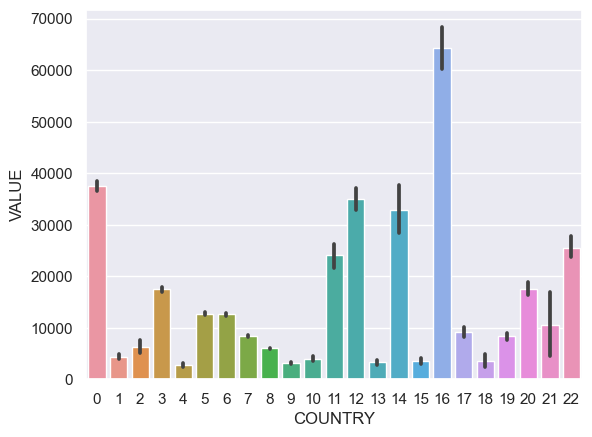

In [136]:
sns.barplot(data=df_C, x="COUNTRY", y='VALUE');

- Netherland is the country with the highest price for Arable Land in 2020. 

Arable land (% of land area) in Netherlands was reported at 29.84 % in 2020, according to the World Bank collection of development indicators, compiled from officially recognized sources. Netherlands - Arable land (% of land area) - actual values, historical data, forecasts and projections were sourced from the World Bank on January of 2023.

In [170]:
df_C.head()

COUNTRY  TIME_PERIOD  VALUE    minmax  standardized  l2_normalized
0        0         2013  36591  0.502185      1.470689       0.132737
1        0         2014  38496  0.529566      1.598081       0.139647
2        1         2013   3175  0.021877     -0.763920       0.011518
3        1         2014   3620  0.028273     -0.734162       0.013132
4        1         2015   3891  0.032168     -0.716039       0.014115

# Sentimental Analysis for reviews

In [171]:
plt.style.use('ggplot')

import nltk

In [172]:
# Read in data
df = pd.read_csv('Reviews.csv')
print(df.shape)
df = df.head(500)
print(df.shape)

(568454, 10)
(500, 10)


In [173]:
df.head()

Id   ProductId          UserId                      ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1   2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3   4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4   5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     1                       1      5  1303862400   
1                     0                       0      1  1346976000   
2                     1                       1      4  1219017600   
3                     3                       3      2  1307923200   
4                     0                       0      5  1350777600   

                 Summary                                               Text  
0  Good Quality Dog Food  I have bought several of the Vitality canned d...  
1      Not as Advertised  Product arrived labeled as Jumbo Salted Peanut...  
2  "Delight" says it all  This is a confection that has been around a fe...  
3         Cough Medicine  If you are looking for the secret ingredient i...  
4            Great taffy  Great taffy at a great price.  There was a wid...

In [174]:
df.shape

(500, 10)

## Quick EDA

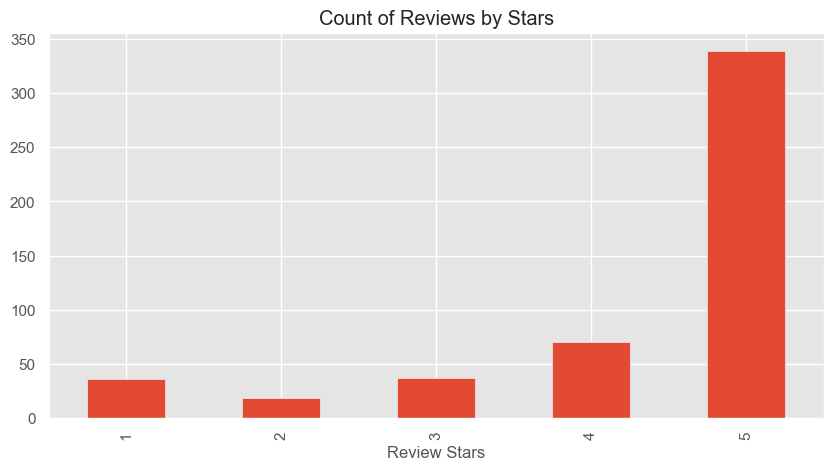

In [175]:
ax = df['Score'].value_counts().sort_index() \
    .plot(kind='bar',
          title='Count of Reviews by Stars',
          figsize=(10, 5))
ax.set_xlabel('Review Stars')
plt.show()

## Basic NLTK

In [180]:
example = df['Text'][80]
print(example)

This peppermint stick is delicious and fun to eat.  My dad got me one for Christmas because he remembered me having a similar one when I was a little girl.  I'm 30 now and I love it!


In [182]:
import nltk
nltk.download('punkt')

tokens = nltk.word_tokenize(example)
#nltk.word.tokenize(example)
tokens[:80]

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ele_9\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


['This',
 'peppermint',
 'stick',
 'is',
 'delicious',
 'and',
 'fun',
 'to',
 'eat',
 '.',
 'My',
 'dad',
 'got',
 'me',
 'one',
 'for',
 'Christmas',
 'because',
 'he',
 'remembered',
 'me',
 'having',
 'a',
 'similar',
 'one',
 'when',
 'I',
 'was',
 'a',
 'little',
 'girl',
 '.',
 'I',
 "'m",
 '30',
 'now',
 'and',
 'I',
 'love',
 'it',
 '!']

In [184]:
import nltk
nltk.download('averaged_perceptron_tagger')

tagged = nltk.pos_tag(tokens)
tagged [:80]

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\ele_9\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.


[('This', 'DT'),
 ('peppermint', 'NN'),
 ('stick', 'NN'),
 ('is', 'VBZ'),
 ('delicious', 'JJ'),
 ('and', 'CC'),
 ('fun', 'NN'),
 ('to', 'TO'),
 ('eat', 'VB'),
 ('.', '.'),
 ('My', 'PRP$'),
 ('dad', 'NN'),
 ('got', 'VBD'),
 ('me', 'PRP'),
 ('one', 'CD'),
 ('for', 'IN'),
 ('Christmas', 'NNP'),
 ('because', 'IN'),
 ('he', 'PRP'),
 ('remembered', 'VBD'),
 ('me', 'PRP'),
 ('having', 'VBG'),
 ('a', 'DT'),
 ('similar', 'JJ'),
 ('one', 'CD'),
 ('when', 'WRB'),
 ('I', 'PRP'),
 ('was', 'VBD'),
 ('a', 'DT'),
 ('little', 'JJ'),
 ('girl', 'NN'),
 ('.', '.'),
 ('I', 'PRP'),
 ("'m", 'VBP'),
 ('30', 'CD'),
 ('now', 'RB'),
 ('and', 'CC'),
 ('I', 'PRP'),
 ('love', 'VBP'),
 ('it', 'PRP'),
 ('!', '.')]

In [ ]:
#import nltk
#nltk.download()
#entities = nltk.chunk.ne_chunk(tagged)
#entities.pprint()

## VADER Sentiment Scoring

In [186]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\ele_9\AppData\Roaming\nltk_data...


In [187]:
sia.polarity_scores('I am so happy!')

{'neg': 0.0, 'neu': 0.318, 'pos': 0.682, 'compound': 0.6468}

In [188]:
sia.polarity_scores('This is the worst thing ever.')

{'neg': 0.451, 'neu': 0.549, 'pos': 0.0, 'compound': -0.6249}

In [ ]:
sia.polarity_scores(example)

In [189]:
# Run the polarity score on the entire dataset
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['Text']
    myid = row['Id']
    res[myid] = sia.polarity_scores(text)

  0%|          | 0/500 [00:00<?, ?it/s]

In [209]:
res;

In [191]:
pd.DataFrame(res)

1       2       3    4       5      6       7       8       9    \
neg       0.0000  0.1380  0.0910  0.0  0.0000  0.029  0.0340  0.0000  0.0000   
neu       0.6950  0.8620  0.7540  1.0  0.5520  0.809  0.6930  0.5200  0.8510   
pos       0.3050  0.0000  0.1550  0.0  0.4480  0.163  0.2730  0.4800  0.1490   
compound  0.9441 -0.5664  0.8265  0.0  0.9468  0.883  0.9346  0.9487  0.6369   

             10   ...     491     492     493     494     495     496     497  \
neg       0.0000  ...  0.0550  0.0000  0.0560  0.1000  0.0000  0.0000  0.0590   
neu       0.7050  ...  0.7040  0.7170  0.8550  0.6450  0.7880  0.5540  0.7990   
pos       0.2950  ...  0.2410  0.2830  0.0890  0.2540  0.2120  0.4460  0.1420   
compound  0.8313  ...  0.9287  0.9367  0.5976  0.6486  0.9743  0.9725  0.7833   

             498    499     500  
neg       0.0250  0.041  0.0000  
neu       0.7620  0.904  0.6780  
pos       0.2120  0.055  0.3220  
compound  0.9848  0.128  0.9811  

[4 rows x 500 columns]

In [192]:
vaders = pd.DataFrame(res).T

In [193]:
vaders = vaders.reset_index().rename(columns={'index': 'Id'})
vaders = vaders.merge(df, how='left')

In [194]:
# Now we have sentiment score and metadata
vaders.head()

Id    neg    neu    pos  compound   ProductId          UserId  \
0   1  0.000  0.695  0.305    0.9441  B001E4KFG0  A3SGXH7AUHU8GW   
1   2  0.138  0.862  0.000   -0.5664  B00813GRG4  A1D87F6ZCVE5NK   
2   3  0.091  0.754  0.155    0.8265  B000LQOCH0   ABXLMWJIXXAIN   
3   4  0.000  1.000  0.000    0.0000  B000UA0QIQ  A395BORC6FGVXV   
4   5  0.000  0.552  0.448    0.9468  B006K2ZZ7K  A1UQRSCLF8GW1T   

                       ProfileName  HelpfulnessNumerator  \
0                       delmartian                     1   
1                           dll pa                     0   
2  Natalia Corres "Natalia Corres"                     1   
3                             Karl                     3   
4    Michael D. Bigham "M. Wassir"                     0   

   HelpfulnessDenominator  Score        Time                Summary  \
0                       1      5  1303862400  Good Quality Dog Food   
1                       0      1  1346976000      Not as Advertised   
2                       1      4  1219017600  "Delight" says it all   
3                       3      2  1307923200         Cough Medicine   
4                       0      5  1350777600            Great taffy   

                                                Text  
0  I have bought several of the Vitality canned d...  
1  Product arrived labeled as Jumbo Salted Peanut...  
2  This is a confection that has been around a fe...  
3  If you are looking for the secret ingredient i...  
4  Great taffy at a great price.  There was a wid...

## Plot VADER Results

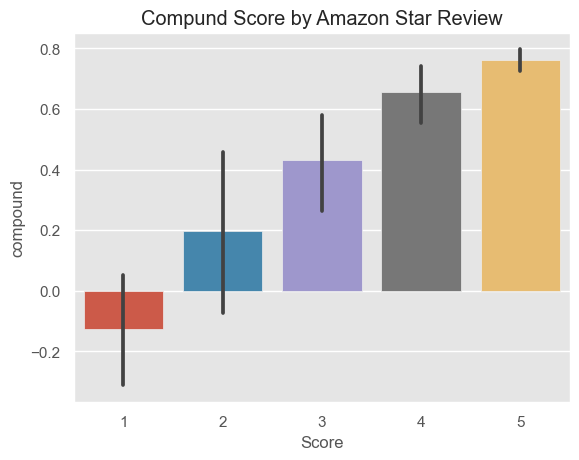

In [196]:
ax = sns.barplot(data=vaders, x='Score', y='compound')
ax.set_title('Compund Score by Amazon Star Review')
plt.show()

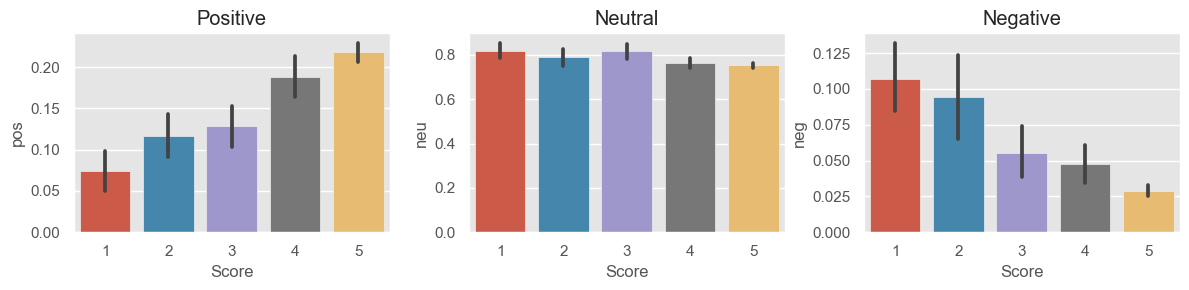

In [197]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=vaders, x='Score', y='pos', ax=axs[0])
sns.barplot(data=vaders, x='Score', y='neu', ax=axs[1])
sns.barplot(data=vaders, x='Score', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

## Comments

As we can see the model worked even when was not an straight text, the model could analysed and explore the next, the example considered was: This peppermint stick is delicious and fun to eat. My dad got me one for Christmas because he remembered me having a similar one when I was a little girl. I'm 30 now and I love it! The example has more than meaning, we think it's negative, in the middle neutral, and just at the end it's totally positive, as the model identified. Text analysis is a process of analysing and understanding written or spoken language. It can be used to extract information from text, identify patterns and trends, and understand the overall sentiment or emotion expressed in the text. There are many different techniques and approaches to text analysis, ranging from simple word counts to more advanced techniques like natural language processing and machine learning. Text analysis is used in a wide range of fields, including natural language processing, psychology, marketing, and political science.

## Conclusion

In this research study, it was proposed and developed various models, as we could explore, analyse and evaluate the Arable land price is incrementing over the years, the agricultural land prices and rents methodology intends to collect comparable statistics on the prices and rents of agricultural land for agricultural use in the European Union, as land is a primary resource for agricultural production. The EU enlargements increased the need for data on agricultural land prices and rents. The main uses of these statistics are comparisons among the Member States and their regions and analyses of the trends in agricultural land prices and rents.

Regarding the project, was very interesting and lot ok knowledge based on practice that now are improved, however I considered a very short period of time in regard to all the tasks and processes we had to deal with, specially the dates that we had to dedicated, also were limitans in regards to processes that for sure needed to be handled different however was kind of late to redo processes.
